In [1]:
import sys
sys.path.append('/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana')

In [19]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
import seaborn as sns
from copy import deepcopy
from useful_func_cy import *

In [3]:
# 12 cmip6 model: deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50


In [4]:
deck_cmip6 = [AWICM11MR, BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CESM2WACCMFV2, CMCCCM2SR5, CNRMESM21, CNRMCM61, CNRMCM61HR, E3SM10, ECEarth3, ECEarth3Veg, FGOALSg3, GFDLCM4, CAMSCSM1, IPSLCM6ALR, INM_CM48, MPIESM12LR, MRIESM20, GISSE21G, GISSE22G, GISSE21H, MIROC6, MIROCES2L, NESM3, NorESM2MM, SAM0, TaiESM1]   #..current # 18 + 12

deck_nas_cmip6 = ['AWICM11MR', 'BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CESM2WACCMFV2', 'CMCCCM2SR5', 'CNRMESM2', 'CNRMCM61', 'CNRMCM61HR', 'E3SM10', 'ECEarth3', 'ECEarth3Veg', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'IPSLCM6ALR', 'INM_CM48', 'MPIESM12LR', 'MRIESM20', 'GISSE21G', 'GISSE21H', 'GISSE22G', 'MIROC6', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'SAM0', 'TaiESM1']

# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

#.. current model #: 18 + 12 (except: '19')
path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/plot_file/plots_Oct24_revise_add_YSSAR/'

In [5]:
## Read two Regimes (Hot,Cold) data

output_ARRAY = {}   # storage output file
output_intermedia = {}   # storage the 'rawdata_dict'

output_dict0_PI = {}
output_dict0_abr = {}

output_GMT = {}
output_2lrm_predict = {}  # dict, store annualy, area_meaned prediction of LWP
output_2lrm_report = {}  # dict, store annually, area_meaned actual values of GCMs LWP
output_2lrm_coef_LWP = {}
output_2lrm_dict_Albedo = {}  # Coefficients of 2 regimes's albedo trained by report 'LWP' data
# output_2lrm_coef_albedo_lL = {}

# Raw data
output_2lrm_yr_bin_abr = {}
output_2lrm_yr_bin_PI = {}
output_2lrm_mon_bin_abr = {}
output_2lrm_mon_bin_PI = {}

# Metric raw data in specific units:
shape_mon_pi = {}
shape_mon_abr = {}
output_2lrm_metric_actual_PI = {}
output_2lrm_metric_actual_abr = {}

# Statistic metrics of PI:
output_Mean_training = {}
output_Stdev_training = {}

# Predict metric data in specific units:
output_2lrm_mon_bin_LWPpredi_PI = {}
output_2lrm_mon_bin_LWPpredi_abr = {}

# Index for regime(s): Only for 2lrm
output_ind_Cold_PI = {}
output_ind_Hot_PI = {}
output_ind_Cold_abr = {}
output_ind_Hot_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    folder_2lrm = glob.glob(path1+deck2[i]['modn'] + '_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest' + '*' + '_dats.npz')
    # print(len(folder_2lrm))
    
    if len(folder_2lrm) == 4:
        if (len(folder_2lrm[0]) < len(folder_2lrm[1])) & (len(folder_2lrm[0]) < len(folder_2lrm[2])) & (len(folder_2lrm[0]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[0]
        elif (len(folder_2lrm[1]) < len(folder_2lrm[0])) & (len(folder_2lrm[1]) < len(folder_2lrm[2])) & (len(folder_2lrm[1]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[2]) < len(folder_2lrm[0])) & (len(folder_2lrm[2]) < len(folder_2lrm[1])) & (len(folder_2lrm[2]) < len(folder_2lrm[3])):
            folder_best2lrm = folder_2lrm[2]
        else:
            folder_best2lrm = folder_2lrm[3]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 3:
        if (len(folder_2lrm[1]) <  len(folder_2lrm[0])) & (len(folder_2lrm[1]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[1]
        elif (len(folder_2lrm[0]) <  len(folder_2lrm[1])) & (len(folder_2lrm[0]) <  len(folder_2lrm[2])):
            folder_best2lrm = folder_2lrm[0]
        else:
            folder_best2lrm = folder_2lrm[2]
        print(folder_best2lrm)
    
    elif len(folder_2lrm) == 2:
        if len(folder_2lrm[1]) <  len(folder_2lrm[0]):
            folder_best2lrm = folder_2lrm[1]
        else:
            folder_best2lrm = folder_2lrm[0]
        print(folder_best2lrm)
        
    else:
        output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_2lrm[0])
    
    output_ARRAY[deck_nas2[i]] =  load(folder_best2lrm, allow_pickle=True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck_nas2[i]] = load(folder_2lrm[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]] = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['predicted_metrics']
    output_2lrm_report[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['report_metrics']

    output_dict0_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['dict1_abr_var']
    
    output_2lrm_coef_LWP[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Coef_dict']
    output_2lrm_dict_Albedo[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['coef_dict_Albedo_pi']
    
    # Monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']
    
    # Flattened Metric monthly mean bin data
    shape_mon_pi[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_PI_3']
    shape_mon_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['shape_mon_abr_3']
    output_2lrm_metric_actual_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_training']
    output_2lrm_metric_actual_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['metric_predict']
    
    # Flattened Predicted monthly bin data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']

    # Statistic metrics of PI:
    output_Mean_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Mean_training']
    output_Stdev_training[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['Stdev_training']
    
    # Indice for Regimes
    output_ind_Hot_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_PI']
    output_ind_Cold_PI[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_PI']

    output_ind_Hot_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Hot_abr']
    output_ind_Cold_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['ind_Cold_abr']

print('Down read 2-LRM.')

/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/BCC-ESM1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-3.63_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CanESM5_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-12.91_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.28_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-FV2_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-0.42_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CESM2-WACCM_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest0.35_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/CNRM-ESM2-1_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-1.55_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-G_r2r1_hotcold(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest-4.57_dats.npz
/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/GISS-E2-1-H_r2r1_hotcold(Jan)_(largestpiR2)_Sep9t

In [6]:
# import numpy as np
from scipy.stats import *

# define the curve function which you intend to fit:
def target_func_poly1(x, a, b):
    '''
    linear fit
    '''
    y = a* x + b
    return y

def target_func_poly2(x, a, b, c): 
    '''
    2d polynomial fit
    '''
    y = a* x**2 + b* x**1 + c
    return y

def target_func_expo(x, a, b, c):

    '''
    exponential fitting
    '''
    y = a * b**x + c
    return y

In [7]:
# Standard deviation of Cloud Controlling factor (Xi) and Liquid Water Path (LWP):

sigmaXi_r1 = full((len(deck2), 4), 0.0)  # Cold
sigmaXi_r2 = full((len(deck2), 4), 0.0)  # Hot
sigmaXi_ALL = full((len(deck2), 4), 0.0)  # All ("Warm" + "Cold" regimes)

sigmaalbedo_r1 = full((len(deck2)), 0.00) # Cold
sigmaalbedo_r2 = full((len(deck2)), 0.00) # Hot

sigmaLWP_r1 = full((len(deck2)), 0.0)  # Cold
sigmaLWP_r2 = full((len(deck2)), 0.0)  # Hot
sigmaLWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean as a whole

sigmaalbedo_ALL = full((len(deck2)), 0.00) # Southern Ocean as a whole

In [8]:
for i in range(len(deck_nas2)):
    
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)

    # print(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI].shape)
    ## calc standard_deviation for CCFs at training period:

    sigmaXi_r1[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Cold_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Cold_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Cold_PI])])
    
    sigmaXi_r2[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][ind_Hot_PI]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][ind_Hot_PI]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][ind_Hot_PI])])
    
    sigmaXi_ALL[i,:] = np.asarray([np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST'][logical_or(ind_Hot_PI, ind_Cold_PI)]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e'][logical_or(ind_Hot_PI, ind_Cold_PI)]), 
                          np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS'][logical_or(ind_Hot_PI, ind_Cold_PI)]), np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB'][logical_or(ind_Hot_PI, ind_Cold_PI)])])
    
    
    
    sigmaLWP_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Cold_PI])
    sigmaLWP_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][ind_Hot_PI])
    sigmaalbedo_r1[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Cold_PI])
    sigmaalbedo_r2[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][ind_Hot_PI])
    sigmaLWP_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP'][logical_or(ind_Cold_PI, ind_Hot_PI)])
    sigmaalbedo_ALL[i] = np.nanstd(output_2lrm_metric_actual_PI[deck_nas2[i]]['albedo'][logical_or(ind_Hot_PI, ind_Cold_PI)])

print(sigmaXi_r1.shape)

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1541: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


(50, 4)


In [9]:
# Changes of variable between 'piControl' (mean-state) and 'abrupt4xCO2' (warming period, take 121 - 140 yrs' mean of abr4x experiment)
# Cloud Controlling factor (Xi), Liquid Water Path (LWP), and global mean surface air Temperature (gmt):
delta_gmt = full(len(deck2), 0.000)

delta_SST = full((len(deck2), 2), 0.0)  # two Regimes, Cold & Hot
delta_p_e = full((len(deck2), 2), 0.0)
delta_LTS = full((len(deck2), 2), 0.0)
delta_SUB = full((len(deck2), 2), 0.0)
delta_LWP = full((len(deck2), 2), 0.0)
delta_LWP_ALL = full((len(deck2)), 0.0)  # Southern Ocean lwp changes
delta_LWP_4050 = full((len(deck2)), 0.0)  # 40 ~ 50^oS lwp changes
delta_LWP_5085 = full((len(deck2)), 0.0)  # 50 ~ 85^oS lwp changes

# Standardized changes of variables
# Cloud Controlling factor (Xi) scaled by 'gmt', Liquid Water Path (LWP):
std_dX_r1 = full((len(deck2), 4), 0.0)  # Standard deviation of large-scale environment factors in Cold Regime
std_dX_r2 = full((len(deck2), 4), 0.0)  # Hot
std_dX_ALL = full((len(deck2), 2), 0.0)  # All ("Warm" + "Cold" regimes) for "SST" & "LTS"


dX_dTg_r1 = full((len(deck2), 4), 0.0)  # Cold
dX_dTg_r2 = full((len(deck2), 4), 0.0)  # Hot
dX_dTg_ALL = full((len(deck2), 2), 0.0)  # All ("Warm" + "Cold" regimes) for "SST" & "LTS"

delta_LWP_dTg = full((len(deck2)), 0.0)  # Southern Ocean lwp changes scaled by gmt 
delta_LWP_dTg4050 = full((len(deck2)), 0.0)  # 40 ~ 50^oS lwp changes scaled by gmt
delta_LWP_dTg5085 = full((len(deck2)), 0.0)  # 50 ~ 85^oS lwp changes scaled by gmt
delta_LWP_dTgr1 = full((len(deck2)), 0.0)  # Cold
delta_LWP_dTgr2 = full((len(deck2)), 0.0)  # Hot

delta_SST_ALL = full((len(deck2)), 0.0)
delta_LTS_ALL = full((len(deck2)), 0.0)

# Coef of LWP to Cloud controlling factors, Xis, for two regimes
# GCM values and the OBS values

stcoef_r1 = full((len(deck2), 4), 0.0)  # Cold
stcoef_r2 = full((len(deck2), 4), 0.0)  # Hot
stcoef_obs = full((4), 0.0)  # Hot Regime Only

In [10]:
from copy import deepcopy

f20yr_index = 121*12
l20yr_index = 141*12

Lat_range1 = [0, 2]   # 40 - 50 
Lat_range2 = [2, 9]   # 50 - 85

for i in range(len(deck_nas2)):
    # indice of Regimes;
    ind_Cold_PI = output_ind_Cold_PI[deck_nas2[i]]
    ind_Hot_PI = output_ind_Hot_PI[deck_nas2[i]]
    ind_Cold_abr = output_ind_Cold_abr[deck_nas2[i]]
    ind_Hot_abr = output_ind_Hot_abr[deck_nas2[i]]
    # print(ind_Cold_PI.shape)
    # print(ind_Hot_abr)
    
    # calc changes of variables in two different regimes:
    
    # indice for 'Hot' and 'Cold' regimes corresponding to the last period
    ind_last20_Cold_abr = deepcopy(output_ind_Cold_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Cold_abr[0:f20yr_index, :, :] = False
    ind_last20_Cold_abr[l20yr_index:, :, :] = False
    ind_last20_Hot_abr = deepcopy(output_ind_Hot_abr[deck_nas2[i]]).reshape(shape_mon_abr[deck_nas2[i]])
    ind_last20_Hot_abr[0:f20yr_index, :, :] = False
    ind_last20_Hot_abr[l20yr_index:, :, :] = False
    ind_last20_All_abr = np.logical_or(ind_last20_Cold_abr, ind_last20_Hot_abr)
    
    ind_last20_Cold_PI = deepcopy(output_ind_Cold_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_Hot_PI = deepcopy(output_ind_Hot_PI[deck_nas2[i]]).reshape(shape_mon_pi[deck_nas2[i]])
    ind_last20_All_PI = np.logical_or(ind_last20_Cold_PI, ind_last20_Hot_PI)
    
    LWP_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    LWP_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    LWP_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LWP_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LWP']).reshape(shape_mon_abr[deck_nas2[i]])
    LWP_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LWP_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LWP_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LWP']).reshape(shape_mon_pi[deck_nas2[i]])
    LWP_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LWP_ALL[i] = np.nanmean(area_mean(LWP_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_all_PI, y_range, x_range))
    delta_LWP_4050[i] = np.nanmean(latitude_mean(LWP_all_abr[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range=[-50., -40.])) - np.nanmean(latitude_mean(LWP_all_PI, y_range, x_range, lat_range=[-50., -40.]))
    delta_LWP_5085[i] = np.nanmean(latitude_mean(LWP_all_abr[f20yr_index:l20yr_index,:, :], y_range, x_range, lat_range=[-85., -50.])) - np.nanmean(latitude_mean(LWP_all_PI, y_range, x_range, lat_range=[-85., -50.]))
    delta_LWP[i, 0] = np.nanmean(area_mean(LWP_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_cold_PI, y_range, x_range))  # Cold regime
    delta_LWP[i, 1] = np.nanmean(area_mean(LWP_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LWP_hot_PI, y_range, x_range))  # Warm regime
    # print('1:', area_mean(LWP_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range))
    # print('2:', area_mean(LWP_cold_PI[:,:,:], y_range, x_range))
    
    
    # SST.
    SST_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    SST_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    SST_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SST_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SST']).reshape(shape_mon_abr[deck_nas2[i]])
    SST_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SST_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SST_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SST']).reshape(shape_mon_pi[deck_nas2[i]])
    SST_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_SST[i, 0] = np.nanmean(area_mean(SST_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_cold_PI, y_range, x_range))
    delta_SST[i, 1] = np.nanmean(area_mean(SST_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_hot_PI, y_range, x_range))
    delta_SST_ALL[i] = np.nanmean(area_mean(SST_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SST_all_PI, y_range, x_range))
    
    # p - e.
    p_e_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    p_e_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['p_e']).reshape(shape_mon_abr[deck_nas2[i]])
    p_e_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    p_e_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    p_e_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['p_e']).reshape(shape_mon_pi[deck_nas2[i]])
    p_e_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan

    delta_p_e[i, 0] = np.nanmean(area_mean(p_e_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_cold_PI, y_range, x_range))
    delta_p_e[i, 1] = np.nanmean(area_mean(p_e_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(p_e_hot_PI, y_range, x_range))

    # LTS.
    
    LTS_all_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_all_abr[np.logical_not(ind_last20_All_abr)] = np.nan
    
    LTS_all_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_all_PI[np.logical_not(ind_last20_All_PI)] = np.nan
    
    LTS_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    LTS_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['LTS']).reshape(shape_mon_abr[deck_nas2[i]])
    LTS_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    LTS_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    LTS_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['LTS']).reshape(shape_mon_pi[deck_nas2[i]])
    LTS_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_LTS[i, 0] = np.nanmean(area_mean(LTS_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_cold_PI, y_range, x_range))
    delta_LTS[i, 1] = np.nanmean(area_mean(LTS_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_hot_PI, y_range, x_range))
    delta_LTS_ALL[i] = np.nanmean(area_mean(LTS_all_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(LTS_all_PI, y_range, x_range))
    
    
    # SUB_500.
    SUB_cold_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_cold_abr[np.logical_not(ind_last20_Cold_abr)] = np.nan
    SUB_hot_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['SUB']).reshape(shape_mon_abr[deck_nas2[i]])
    SUB_hot_abr[np.logical_not(ind_last20_Hot_abr)] = np.nan
    SUB_cold_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_cold_PI[np.logical_not(ind_last20_Cold_PI)] = np.nan
    SUB_hot_PI = deepcopy(output_2lrm_metric_actual_PI[deck_nas2[i]]['SUB']).reshape(shape_mon_pi[deck_nas2[i]])
    SUB_hot_PI[np.logical_not(ind_last20_Hot_PI)] = np.nan
    
    delta_SUB[i, 0] = np.nanmean(area_mean(SUB_cold_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_cold_PI, y_range, x_range))
    delta_SUB[i, 1] = np.nanmean(area_mean(SUB_hot_abr[f20yr_index:l20yr_index,:,:], y_range, x_range)) - np.nanmean(area_mean(SUB_hot_PI, y_range, x_range))
    
    # gmt.
    gmt_abr = deepcopy(output_2lrm_metric_actual_abr[deck_nas2[i]]['gmt'])
    delta_gmt[i] = np.nanmean(gmt_abr[f20yr_index:l20yr_index])

# print(delta_gmt)
# print(sigmaLWP_r2)
# print(sigmaLWP_ALL)
# print(delta_SUB)

In [11]:
# changes of variables;
# standardized change of Xi scaled by gmt, lwp change scaled by 'gmt':

for i in range(len(deck_nas2)):
    
    dX_dTg_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]] / delta_gmt[i]).flatten()) / sigmaXi_r1[i, :]  # Cold
    dX_dTg_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]] / delta_gmt[i]).flatten()) / sigmaXi_r2[i, :]  # Hot
    dX_dTg_ALL[i, :] = (np.asarray([delta_SST_ALL[i], delta_LTS_ALL[i]] / delta_gmt[i]).flatten()) / [sigmaXi_ALL[i,0], sigmaXi_ALL[i, 2]]  # All
    
    std_dX_r1[i, :] = (np.asarray([delta_SST[i, 0], delta_p_e[i, 0], delta_LTS[i, 0], delta_SUB[i,0]]).flatten()) / sigmaXi_r1[i, :]  # Cold
    std_dX_r2[i, :] = (np.asarray([delta_SST[i, 1], delta_p_e[i, 1], delta_LTS[i, 1], delta_SUB[i,1]]).flatten()) / sigmaXi_r2[i, :]  # Hot
    std_dX_ALL[i, :] = (np.asarray([delta_SST_ALL[i], delta_LTS_ALL[i]]).flatten()) / [sigmaXi_ALL[i,0], sigmaXi_ALL[i, 2]]  # All: standard deviation of CCFs

    
    delta_LWP_dTg[i] = (delta_LWP_ALL[i] / delta_gmt[i])
    delta_LWP_dTg4050[i] = (delta_LWP_4050[i] / delta_gmt[i])
    delta_LWP_dTg5085[i] = (delta_LWP_5085[i] / delta_gmt[i])
    delta_LWP_dTgr1[i] = (1000. * delta_LWP[i, 0]) / delta_gmt[i]
    delta_LWP_dTgr2[i] = (1000. * delta_LWP[i, 1]) / delta_gmt[i]

# print(dX_dTg_r1)
# print(delta_LWP_dTgr2)

In [12]:
print(delta_SST[:, 0])

[1.68720043 3.36430474 2.08228306 1.34045685 1.32547444 0.76412903
 1.88338257 0.59015449 1.40707685 5.27937831 2.09521054 1.02195763
 2.42117538 1.09018835 1.61603187 1.08765903 1.40329979 1.25437634
 1.25614327 1.44811476 1.09750519 0.82179921 2.55032232 2.38773758
 2.34880717 1.2824677  2.1465396  1.51921762 1.05796752 1.86819173
 0.73132705 1.70576803 1.99468001 1.09253889 1.85135979 1.1043691
 1.55225084 2.59770925 0.94910168 0.64458557 1.51141789 1.82000594
 0.24366029 1.40118284 1.31797112 2.39622126 0.29162417 0.56493847
 1.33318559 1.01959002]


In [13]:
# standardized coefficient of GCM:
coef_cold = []
intp_cold = []
coef_hot = []
intp_hot = []

for i in range(len(deck_nas2)):
    # print(output_2lrm_coef_LWP[deck_nas2[i]].shape)
    
    a_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][0].copy()
    a_le = output_2lrm_coef_LWP[deck_nas2[i]][1][0].copy()
    a0_lt = output_2lrm_coef_LWP[deck_nas2[i]][0][1].copy()
    a0_le = output_2lrm_coef_LWP[deck_nas2[i]][1][1].copy()
    
    coef_cold.append(array(a_lt))
    coef_hot.append(array(a_le))
    intp_cold.append(array(a0_lt))
    intp_hot.append(array(a0_le))

for j in range(len(deck_nas2)):
    # print(coef_cold[j].shape)
    # print(sigmaXi_r1[j,:].shape)
    stcoef_r1[j, :] = 1000. * coef_cold[j] * sigmaXi_r1[j, :]  # Cold
    stcoef_r2[j, :] = 1000. * coef_hot[j] * sigmaXi_r2[j, :]  # Warm
    
# print(coef_hot)
# print(stcoef_r2[:,:])

In [14]:
Coef_Warm = asarray(coef_hot)
print(Coef_Warm.shape)

(50, 4)


In [15]:
print(delta_SST_ALL)

print(delta_LTS_ALL)

[4.01145569 7.09852593 7.60172039 6.84700566 6.99909885 5.74179299
 4.02189825 4.89921326 5.6644124  5.44925104 1.69343636 6.69846144
 7.98448588 3.26810007 5.28041603 3.23863044 3.30339918 3.39194029
 4.78758013 4.771207   6.82196132 7.18605377 7.46586431 5.15629111
 5.02443171 2.44380658 2.19203977 5.34741917 2.19699526 7.61473398
 7.36796495 5.77692059 5.63340183 5.38309738 5.29970029 4.28710218
 6.6937819  3.46139309 2.49533431 2.27845572 3.51848085 2.53284544
 3.70304406 3.22514258 5.95337454 4.51328171 3.46169339 5.20319766
 1.73116845 1.86525595]
[ 1.22376877  1.6590293   1.48523072  1.12362106  1.06334438  0.75354594
  1.16411511  0.67588663  1.03640133  0.41050612  1.80665144  0.25356068
  1.08224108  0.95949784  0.88688045  1.31018248  0.62268698  1.4221437
  0.77806164  1.40806968  0.96952313  0.3004283   0.30223232  1.16666733
  1.21841791  1.15924788  1.72294188  1.78120729  1.62060914  0.7411503
 -0.72816429 -0.04566667  0.35677728  0.45309289  1.18315033  0.23400462
  0.

Text(0, 0.5, '$\\Delta LTS,\\ [K]$')

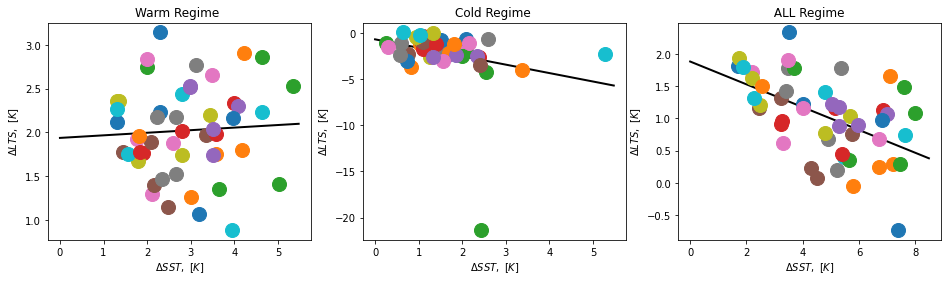

In [18]:
# Plot the relationship between \Delta LTS and \Delta SST in the Warm (Cold) regimes: 

from matplotlib import cm
fig = plt.figure(figsize = (16, 4))

# Warm Regime:
ax1 = fig.add_subplot(131)


Del_SST_Warm = []
Del_LTS_Warm = []
for i in range(len(deck_nas2)):
    
    ax1.plot(delta_SST[i, 1], delta_LTS[i, 1], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Warm.append(delta_SST[i, 1])
    Del_LTS_Warm.append(delta_LTS[i, 1])
    
x = np.arange(0, 5.5, 0.025)
Popt_TsStability_Warm, Pocv_TsStability_Warm = curve_fit(target_func_poly1, Del_SST_Warm, Del_LTS_Warm)
ax1.plot(x, x * Popt_TsStability_Warm[0] + Popt_TsStability_Warm[1], '-', c = 'k', linewidth = 2)
ax1.set_title("Warm Regime ")
ax1.set_xlabel(r"$\Delta SST,\ [K]$")
ax1.set_ylabel(r"$\Delta LTS,\ [K]$")



# Cold Regime:
ax2 = fig.add_subplot(132)

Del_SST_Cold = []
Del_LTS_Cold = []
for i in range(len(deck_nas2)):
    
    ax2.plot(delta_SST[i, 0], delta_LTS[i, 0], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Cold.append(delta_SST[i, 0])
    Del_LTS_Cold.append(delta_LTS[i, 0])
    
x = np.arange(0, 5.5, 0.025)

Popt_TsStability_Cold, Pocv_TsStability_Cold = curve_fit(target_func_poly1, Del_SST_Cold, Del_LTS_Cold)
ax2.plot(x, x * Popt_TsStability_Cold[0] + Popt_TsStability_Cold[1], '-', c = 'k', linewidth = 2)
ax2.set_title("Cold Regime ")
ax2.set_xlabel(r"$\Delta SST,\ [K]$")
ax2.set_ylabel(r"$\Delta LTS,\ [K]$")

# All Regime: "Warm" + "Cold":
ax3 = fig.add_subplot(133)

Del_SST_All = []
Del_LTS_All = []


for i in range(len(deck_nas2)): 
    
    ax3.plot(delta_SST_ALL[i], delta_LTS_ALL[i],  marker = 'o', markersize = 14, zorder = 13)
    
    Del_SST_All.append(delta_SST_ALL[i])
    Del_LTS_All.append(delta_LTS_ALL[i])

x = np.arange(0, 8.5, 0.025)

Popt_TsStability_All, Pocv_TsStability_All = curve_fit(target_func_poly1, Del_SST_All, Del_LTS_All)
ax3.plot(x, x * Popt_TsStability_All[0] + Popt_TsStability_All[1], '-', c = 'k', linewidth = 2)

ax3.set_title(" ALL Regime ")
ax3.set_xlabel(r"$\Delta SST,\ [K]$")
ax3.set_ylabel(r"$\Delta LTS,\ [K]$")

Text(0, 0.5, '$\\Delta LTS / \\Delta gmt,\\ [Std/K]$')

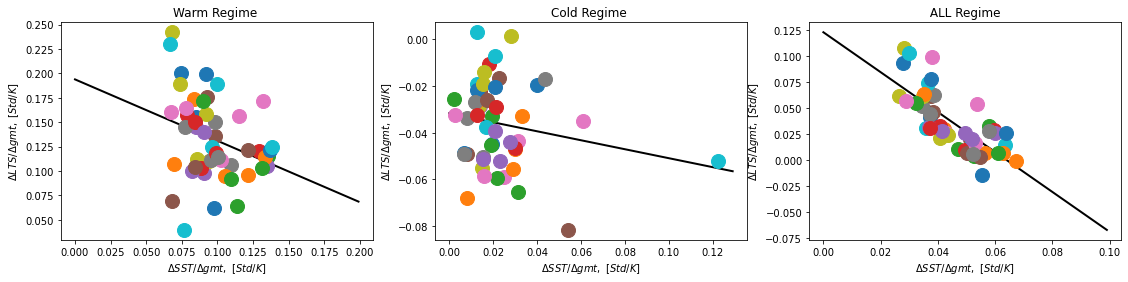

In [19]:
# Plot the relationship between d_LTS / dTg and d_SST / dTg in the Warm (Cold) regimes: 

from matplotlib import cm
fig = plt.figure(figsize = (19, 4))

# Warm Regime:
ax1 = fig.add_subplot(131)

Del_SST_Warm = []
Del_LTS_Warm = []
for i in range(len(deck_nas2)):
    
    ax1.plot(dX_dTg_r2[i, 0], dX_dTg_r2[i, 2], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Warm.append(dX_dTg_r2[i, 0])
    Del_LTS_Warm.append(dX_dTg_r2[i, 2])
    
x = np.arange(0, 0.20, 0.0010)

Popt_stdTsStability_Warm, Pocv_stdTsStability_Warm = curve_fit(target_func_poly1, Del_SST_Warm, Del_LTS_Warm)
ax1.plot(x, x * Popt_stdTsStability_Warm[0] + Popt_stdTsStability_Warm[1], '-', c = 'k', linewidth = 2)
ax1.set_title("Warm Regime ")
ax1.set_xlabel(r"$\Delta SST / \Delta gmt,\ [Std/K]$")
ax1.set_ylabel(r"$\Delta LTS / \Delta gmt,\ [Std/K]$")


# Cold Regime:
ax2 = fig.add_subplot(132)

Del_SST_Cold = []
Del_LTS_Cold = []
for i in range(len(deck_nas2)):
    
    ax2.plot(dX_dTg_r1[i, 0], dX_dTg_r1[i, 2], marker = 'o', markersize = 14, zorder = 12)
    
    Del_SST_Cold.append(dX_dTg_r1[i, 0])
    Del_LTS_Cold.append(dX_dTg_r1[i, 2])
    
x = np.arange(0, 0.13, 0.0010)

Popt_stdTsStability_Cold, Pocv_stdTsStability_Cold = curve_fit(target_func_poly1, Del_SST_Cold, Del_LTS_Cold)
ax2.plot(x, x * Popt_stdTsStability_Cold[0] + Popt_stdTsStability_Cold[1], '-', c = 'k', linewidth = 2)
ax2.set_title("Cold Regime ")
ax2.set_xlabel(r"$\Delta SST / \Delta gmt,\ [Std/K]$")
ax2.set_ylabel(r"$\Delta LTS / \Delta gmt,\ [Std/K]$")


# All Regime: "Warm" + "Cold":
ax3 = fig.add_subplot(133)

Del_SST_All = []
Del_LTS_All = []


for i in range(len(deck_nas2)): 
    
    ax3.plot(dX_dTg_ALL[i, 0], dX_dTg_ALL[i, 1],  marker = 'o', markersize = 14, zorder = 13)
    
    Del_SST_All.append(dX_dTg_ALL[i, 0])
    Del_LTS_All.append(dX_dTg_ALL[i, 1])

x = np.arange(0, 0.10, 0.0010)

Popt_stdTsStability_All, Pocv_stdTsStability_All = curve_fit(target_func_poly1, Del_SST_All, Del_LTS_All)
ax3.plot(x, x * Popt_stdTsStability_All[0] + Popt_stdTsStability_All[1], '-', c = 'k', linewidth = 2)

ax3.set_title(" ALL Regime ")
ax3.set_xlabel(r"$\Delta SST / \Delta gmt,\ [Std/K]$")
ax3.set_ylabel(r"$\Delta LTS / \Delta gmt,\ [Std/K]$")

In [20]:
print(Popt_TsStability_Warm)
print(Popt_TsStability_Cold)
print(Popt_TsStability_All)

[0.02946097 1.93806059]
[-0.91483071 -0.67454689]
[-0.17673795  1.88135249]


In [21]:
print(Popt_stdTsStability_Warm)
print(Popt_stdTsStability_Cold)
print(Popt_stdTsStability_All)

[-0.62949075  0.19385461]
[-0.19257453 -0.03167323]
[-1.92007221  0.12254477]


In [65]:
# import Zelinka's data for current CMIP5, CMIP6 models:

import json
f = open('cmip56_forcing_feedback_ecs.json','r')
data = json.load(f)

data.keys()

dict_keys(['CMIP5', 'CMIP6', 'metadata', 'provenance'])

In [66]:
i = 32
print(data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD'])

-0.21267740521414022


In [67]:
# read through CMIP5 + CMIP6 :
EffCS = {}
SWCLD = {}

for i in range(len(deck_nas2)):
    
    if deck2[i]['cmip'] == 'cmip5':
        EffCS[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
        SWCLD[deck_nas2[i]] = data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']
        
    if deck2[i]['cmip'] == 'cmip6':
        
        if deck2[i]['modn'] == 'EC-Earth3':
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD']
        else:
            EffCS[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS']
            SWCLD[deck_nas2[i]] = data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD']
        
# print(SWCLD)

In [19]:
k = 0
for i in range(len(deck2)):
    
    if EffCS[deck_nas2[i]] >= 4.7:
        k += 1
print(k)

8


In [30]:
# Read CMIP5/ 6 Cloud feedbacks data

import netCDF4 as nc
fn_cmip5 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP5_cld_fbks.nc'
fn_cmip6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP6_cld_fbkd_July12.nc'

# glob.glob(fn_cmip5)
f_cmip5 = nc.Dataset(fn_cmip5, 'r')
f_cmip6 = nc.Dataset(fn_cmip6, 'r')
# print(f_cmip5.variables['model'])
# print(f_cmip6.variables)

# variables from Zelinka's SWfb files:
lat_mz = np.asarray(f_cmip6.variables['latitude'])
bound_lat_mz = np.asarray(f_cmip6.variables['bounds_latitude'])

lon_mz = np.asarray(f_cmip6.variables['longitude'])
bound_lon_mz = np.asarray(f_cmip6.variables['bounds_longitude'])

# convert longitude matrix from (0, 360) to (-180., 180.):
lon_mz2 = lon_mz[:]*1.
bound_lon_mz2 = bound_lon_mz[:] * 1.
lon_mz2[lon_mz2 > 180] = lon_mz2[lon_mz2 > 180]-360.
bound_lon_mz2[bound_lon_mz2 > 180] = bound_lon_mz2[bound_lon_mz2 > 180] - 360
ind_lon = argsort(lon_mz2)
lon_mz2 = lon_mz2[ind_lon]

bound_lon_mz2 = bound_lon_mz2[ind_lon, :]
# print(lon_mz2)
# print(bound_lon_mz2)
# model_names:
cmip6model_nas = f_cmip6.variables['model'].long_name
cmip5model_nas = f_cmip5.variables['model'].long_name

cmip6_nas = cmip6model_nas[1:-1].split()
for i in range(len(cmip6_nas)):
    cmip6_nas[i] = cmip6_nas[i][1:-1]
    
cmip5_nas = cmip5model_nas[1:-1].split()
for i in range(len(cmip5_nas)):
    cmip5_nas[i] = cmip5_nas[i][1:-1]
# print(cmip6_nas)
# print(cmip5_nas)

model_nas = []
model_nas = np.append(cmip6_nas, cmip5_nas)
print(model_nas)

# SW_cloud_Feedback:
sw_cld_fb_mz = []

cmip6_sw_cld_fb_mz = np.asarray(f_cmip6.variables['SWCLD_fbk6_map'])
cmip5_sw_cld_fb_mz = np.asarray(f_cmip5.variables['SWCLD_fbk5_map'])

sw_cld_fb_mz = np.append(cmip6_sw_cld_fb_mz, cmip5_sw_cld_fb_mz, axis = 2)
print(sw_cld_fb_mz.shape)

# Handle nan value
sw_cld_fb_mz = np.where(sw_cld_fb_mz!=1.e+20, sw_cld_fb_mz, np.nan)
ind_nan = np.isnan(sw_cld_fb_mz)
# print(np.nonzero(ind_nan==True))  # #0

reshape_sw_cld_fb = np.transpose(sw_cld_fb_mz,(2, 0, 1))

print(reshape_sw_cld_fb.shape)
# SO_sw_cldfb = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi1+1+1),:], y_range_swcld, x_range_swcld) # -85.S ~ -40.S
SO_sw_cldfb = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -40.])
# SO_sw_cldfb_5085 = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi2+1+1),:], y_range_swcld5085, x_range_swcld) # -85.S ~ -50.S
SO_sw_cldfb_5085 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -50.])
# SO_sw_cldfb_4050 = area_mean(reshape_sw_cld_fb[:,(latsi2+1):(latsi1+1+1),:], y_range_swcld4050, x_range_swcld) # -50.S ~ -40.S
SO_sw_cldfb_4050 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-50., -40.])

# print(SO_sw_cldfb)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' 'BCC-ESM1'
 'CAMS-CSM1-0' 'CESM2' 'CESM2-FV2' 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM'
 'CMCC-CM2-SR5' 'CMCC-ESM2' 'CNRM-CM6-1' 'CNRM-CM6-1-HR' 'CNRM-ESM2-1'
 'CanESM5' 'E3SM-1-0' 'EC-Earth3' 'EC-Earth3-AerChem' 'EC-Earth3-Veg'
 'FGOALS-f3-L' 'FGOALS-g3' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-H' 'GISS-E2-2-G' 'HadGEM3-GC31-LL' 'HadGEM3-GC31-MM'
 'IITM-ESM' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM5A2-INCA' 'IPSL-CM6A-LR'
 'IPSL-CM6A-LR-INCA' 'KACE-1-0-G' 'MIROC-ES2L' 'MIROC6' 'MPI-ESM-1-2-HAM'
 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NESM3' 'NorCPM1'
 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1' 'UKESM1-0-LL'
 'ACCESS1-0' 'ACCESS1-3' 'BNU-ESM' 'CCSM4' 'CNRM-CM5' 'CSIRO-Mk3-6-0'
 'CanESM2' 'FGOALS-g2' 'FGOALS-s2' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M'
 'GISS-E2-H' 'GISS-E2-R' 'HadGEM2-ES' 'IPSL-CM5A-LR' 'IPSL-CM5A-MR'
 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC5' 'MPI-ESM-LR' 'MPI-ESM-MR' 'MPI-ESM-P'
 'MRI-CGCM3' 'NorESM1-M' 'N

Text(0, 0.5, '$\\frac{dLWP}{dSST}\\ -\\ 0.62 * \\frac{dLWP}{dLTS},\\ [g m^{-2} / std^{-1}]$')

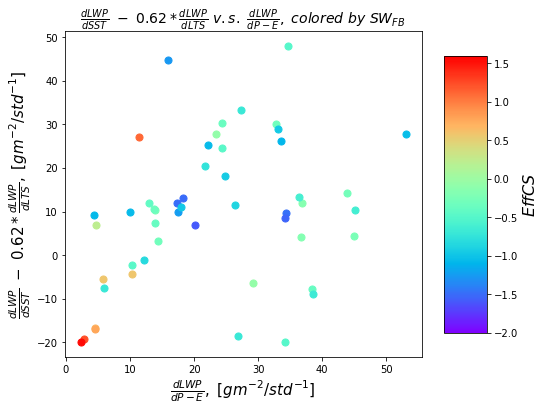

In [28]:
# Plot d_LWP/d_P - E against d_LWP/d_SST - 0.1767* d_LWP/d_LTS
from matplotlib import cm
fig = plt.figure(figsize = (8, 6))

ax4 = fig.add_subplot(111)

SW_FB_4085 = []
SW_FB_5085 = []
SW_FB_4050 = []

for i in range(len(deck2)):
    for j in range(len(SO_sw_cldfb)):
        # 50
        if (deck2[i]['modn']== model_nas[j]):
            # if (i in modelconstraintbystep1_nas):
            SW_FB_4085 = np.append(SW_FB_4085, SO_sw_cldfb[j])
            SW_FB_4050 = np.append(SW_FB_4050, SO_sw_cldfb_4050[j])
            SW_FB_5085 = np.append(SW_FB_5085, SO_sw_cldfb_5085[j])
    
    dist1 = ax4.scatter(stcoef_r2[i, 1], stcoef_r2[i, 0]- 0.63 * stcoef_r2[i, 2], c = SW_FB_4085[i], s = 50, cmap = cm.rainbow, vmin = -2.00, vmax = 1.60)  # vmin = 2.10, vmax = 5.80 vmin=-1.00, vmax =1.00
    
    # print(stcoef_r2[i, 0], stcoef_r2[i, 0] - 0.1767 * stcoef_r2[i, 2])
cb1 = fig.colorbar(dist1, ax = ax4, shrink = 0.85, aspect = 6.5)
cb1.set_label(r"$ EffCS $", fontsize = 16)

ax4.set_title(r"$\frac{dLWP}{dSST}\ -\ 0.62 * \frac{dLWP}{dLTS}\ v.s.\ \frac{dLWP}{dP-E},\ colored\ by\ SW_{FB}$", fontsize = 14)

ax4.set_xlabel(r"$\frac{dLWP}{dP-E},\ [g m^{-2} / std^{-1}]$", fontsize = 15)
ax4.set_ylabel(r"$\frac{dLWP}{dSST}\ -\ 0.62 * \frac{dLWP}{dLTS},\ [g m^{-2} / std^{-1}]$", fontsize = 15)

# plt.savefig(path6 +"dLWP_dP-E__vs__dLWP_dSST-c1*dLWP_dLTS__cbySOSWfb.jpg", bbox_inches = 'tight', dpi = 200)

Text(0, 0.5, '$SW_{FB} $')

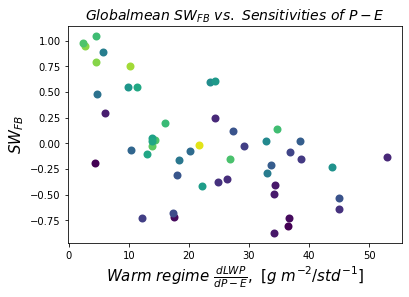

In [29]:
plt.figure()

for i in range(len(deck_nas2)):
    
    plt.scatter(stcoef_r2[i, 1] + 0. * stcoef_r2[i, 0], SWCLD[deck_nas2[i]], c = EffCS[deck_nas2[i]], linewidth = 2., vmin = 2.2, vmax = 5.80)  # - 0.62 * stcoef_r2[i, 2]
    

plt.title(r"$Global mean\ SW_{FB}\ vs.\ Sensitivities\ of\ P - E$", fontsize = 14)  # T_{s}

plt.xlabel(r"$Warm\ regime\ \frac{dLWP}{dP-E},\ [g\ m^{-2} / std^{-1}]$", fontsize = 15)  # \ +\ \frac{dLWP}{dTs}
plt.ylabel(r"$SW_{FB} $", fontsize = 15)

# plt.savefig(path6 +"SWfb_Global_vs._Warm_dLWP_dP-E.jpg", bbox_inches = 'tight')

In [31]:
pearsonr_map_SWfb_dLWPdP_E = np.full((reshape_sw_cld_fb.shape[1], reshape_sw_cld_fb.shape[2]), 999.9)
pvalue_map_SWfb_dLWPdP_E = np.full((reshape_sw_cld_fb.shape[1], reshape_sw_cld_fb.shape[2]), 999.9)

SWCLD_specific_models = []
print(pearsonr_map_SWfb_dLWPdP_E.shape)

# get the SW cloud feedback for our models list:
for i in range(len(deck2)):
    for j in range(reshape_sw_cld_fb.shape[0]):
        
        if (deck2[i]['modn'] == model_nas[j]):
            
            SWCLD_specific_models.append(reshape_sw_cld_fb[j])

SWCLD_specific_models = np.asarray(SWCLD_specific_models)
# print(reshape_sw_cld_fb[61])
# print(SWCLD_specific_models[49])

# processing NaN values:
ind_false_SWCLD = np.isnan(SWCLD_specific_models)
SWCLD_withoutNaN = deepcopy(SWCLD_specific_models)
SWCLD_withoutNaN[ind_false_SWCLD] = 999

# convert SWCLD metric longitude from (0, 360) to (-180., 180.):
SWCLD_withoutNaN = SWCLD_withoutNaN[:, :, ind_lon]


print(np.asarray(np.nonzero(ind_false_SWCLD == True)).shape)
print(SWCLD_withoutNaN[:,2, 3].shape)

# Calc the correlation coefficients map:
for k in range(reshape_sw_cld_fb.shape[1]):  
    for t in range(reshape_sw_cld_fb.shape[2]):
        
        a, b = pearsonr(stcoef_r2[:, 1], SWCLD_withoutNaN[:,k,t])
        pearsonr_map_SWfb_dLWPdP_E[k, t] = a
        pvalue_map_SWfb_dLWPdP_E[k, t] = b
    

print(pearsonr(stcoef_r2[:, 1], SWCLD_withoutNaN[:, 1, 1]))

(90, 144)
(3, 0)
(50,)
(0.018026161593693288, 0.9011170988022474)


In [22]:
print(pvalue_map_SWfb_dLWPdP_E)

[[0.96025397 0.98488724 0.96316525 ... 0.92723601 0.94697662 0.93467574]
 [0.77911029 0.9011171  0.86029634 ... 0.2740468  0.48531673 0.59107905]
 [0.48323111 0.96643297 0.76368151 ... 0.58310642 0.35500465 0.41638862]
 ...
 [0.22791584 0.21866013 0.20401863 ... 0.2263702  0.22932311 0.23518696]
 [0.28474221 0.25627567 0.28452277 ... 0.25251393 0.29749064 0.29175138]
 [0.37611774 0.38141829 0.38023138 ... 0.36450901 0.36927935 0.37158334]]


(50, 90, 144)
['#4961d2', '#4f69d9', '#5572df', '#5a78e4', '#6180e9', '#6788ee', '#6e90f2', '#7396f5', '#7a9df8', '#81a4fb', '#86a9fc', '#8db0fe', '#94b6ff', '#9abbff', '#a1c0ff', '#a7c5fe', '#aec9fc', '#b3cdfb', '#bad0f8', '#c0d4f5', '#c5d6f2', '#cbd8ee', '#d1dae9', '#d5dbe5', '#dadce0', '#dfdbd9', '#e4d9d2', '#e8d6cc', '#ecd3c5', '#efcebd', '#f2cbb7', '#f4c6af', '#f5c0a7', '#f7bca1', '#f7b599', '#f7af91', '#f7a889', '#f6a283', '#f49a7b', '#f29274', '#f08b6e', '#ed8366', '#e97a5f', '#e67259', '#e26952', '#dd5f4b', '#d75445', '#d24b40', '#cc403a', '#c53334']


Text(0.5, 0, '$lat$')

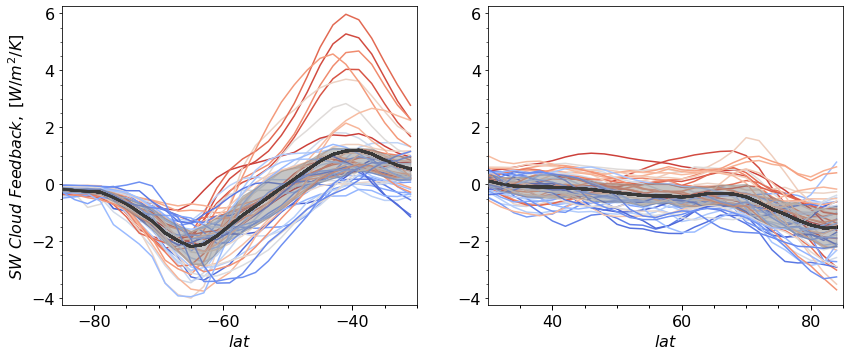

In [31]:
# Re-plot of Fig 1: SW_FB in raw resolutions vs. Lat of extra-tropical:
import matplotlib
parameters = {'axes.labelsize': 16, 'legend.fontsize': 14,
         'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

ax1.minorticks_on()
ax1.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
ax1.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

ax2.minorticks_on()
ax2.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
ax2.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)


print(SWCLD_withoutNaN.shape)

p50_MM = full((SWCLD_withoutNaN.shape[1], 2), 0.00)
p95_MM = full((SWCLD_withoutNaN.shape[1], 2), 0.00)

# print(lat_mz)
lat_range1 = [-85., -30.] 
lat_range2 = [ 30.,  85.]
ind1 = (lat_mz <=max(lat_range1)) & (lat_mz >= min(lat_range1))
ind2 = (lat_mz <=max(lat_range2)) & (lat_mz >= min(lat_range2))


lonmean_MLAT_swcld = nanmean(SWCLD_withoutNaN, axis = (2))
for i in range(SWCLD_withoutNaN.shape[1]):
    p50_MM[i, 0] = nanpercentile(lonmean_MLAT_swcld[:, i], 25.)
    p95_MM[i, 0] = nanpercentile(lonmean_MLAT_swcld[:, i], 2.5)
    p50_MM[i, 1] = nanpercentile(lonmean_MLAT_swcld[:, i], 75.)
    p95_MM[i, 1] = nanpercentile(lonmean_MLAT_swcld[:, i], 97.5)
mean_LAT_swcld = nanmean(SWCLD_withoutNaN, axis = (0, 2))

ECS = []
for i in range(len(deck_nas2)):
    ECS.append(EffCS[deck_nas2[i]])
ECS = np.asarray(ECS)

sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
# print(sorted_EffCS_index)
# print(ordinal_EffCS_index)


# Colors:
coolwarm_colormap = matplotlib.cm.get_cmap("coolwarm")
COLORS = [coolwarm_colormap(x) for x in np.linspace(0.05, 0.95, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
print(COLORS)

for i in range(len(deck_nas2)):
    
    ss = SWCLD_withoutNaN[i, :,:]
    xx = nanmean(ss, axis = 1)
    # Remove the NaN value in 1-D vector:
    ind_truevector = isnan(xx)==False
    
    ind1_true = logical_and(ind1, ind_truevector)
    ind2_true = logical_and(ind2, ind_truevector)
    # print(arange(min(lat_range1), max(lat_range1), 2.))
    ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), xx[ind1_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), mean_LAT_swcld[ind1_true], linewidth = 2.5, c = 'k', linestyle = '-')
    
    ax2.plot(arange(min(lat_range2), max(lat_range2), 2.), xx[ind2_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax2.plot(arange(min(lat_range2), max(lat_range2), 2.), mean_LAT_swcld[ind2_true], linewidth = 2.5, c = 'k', linestyle = '-')
    
# Shading:

# ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), p50_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
# ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), p50_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
# ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), p95_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
# ax1.plot(arange(min(lat_range1), max(lat_range1), 2.), p95_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
ax1.fill_between(arange(min(lat_range1), max(lat_range1), 2.), p50_MM[:, 0][ind1_true], p50_MM[:, 1][ind1_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax1.fill_between(arange(min(lat_range1), max(lat_range1), 2.), p95_MM[:, 0][ind1_true], p95_MM[:, 1][ind1_true], color = 'gray', alpha = 0.35, zorder = 99)

# ax2.plot(arange(min(lat_range2), max(lat_range2), 2.), p50_MM[:, 0][ind2_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
# ax2.plot(arange(min(lat_range2), max(lat_range2), 2.), p50_MM[:, 1][ind2_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
ax2.fill_between(arange(min(lat_range2), max(lat_range2), 2.), p50_MM[:, 0][ind2_true], p50_MM[:, 1][ind2_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax2.fill_between(arange(min(lat_range2), max(lat_range2), 2.), p95_MM[:, 0][ind2_true], p95_MM[:, 1][ind2_true], color = 'gray', alpha = 0.35, zorder = 99)

# Plot setting:
ax1.set_xlim(-85., -30.)
ax1.set_xticks(arange(-80., -30., 20.))
ax1.set_ylim(-4.25, 6.25)

ax2.set_xlim(30., 85.)
ax2.set_xticks(arange(40., 85., 20.))
ax2.set_ylim(-4.25, 6.25)

ax1.set_xlabel(r"$lat$")
ax1.set_ylabel(r"$SW\ Cloud\ Feedback,\ [W/m^{2}/K] $")

ax2.set_xlabel(r"$lat$")
# ax2.set_ylabel(r"$SW\ Cloud\ Feedback,\ [W/m^{2}/K] $")

# plt.savefig(path6 +"Fig1:(a).jpg", bbox_inches = 'tight', dpi = 425)

(90,) (144,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


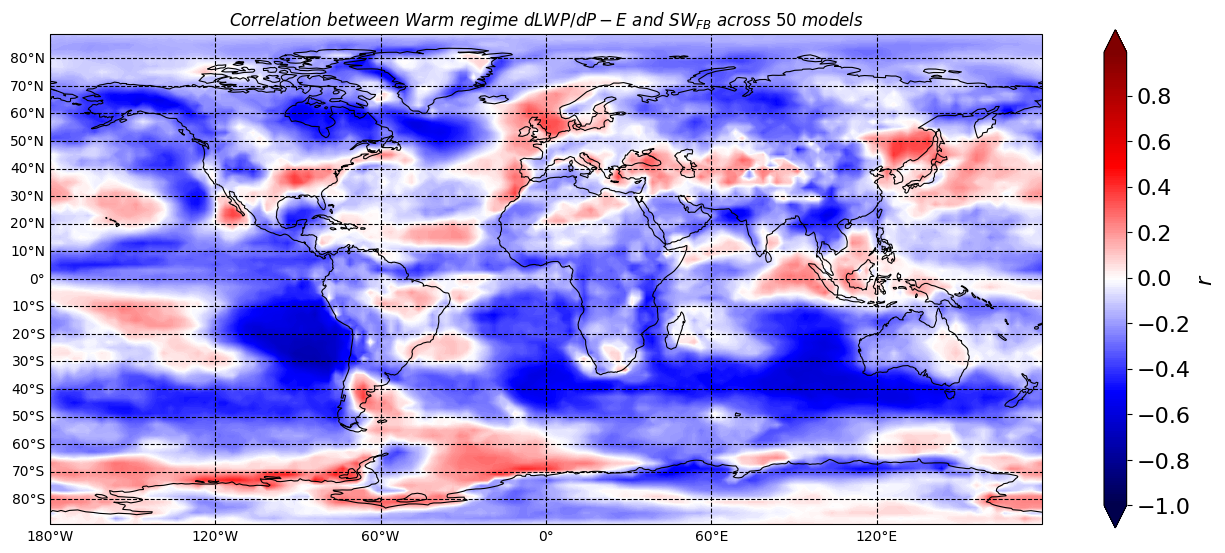

In [32]:
# Plotting the correlation map of grid specific SWCLD to 'd_LWP_d_P - E';
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Latitude and Longitude array:
LAT = lat_mz
LON = lon_mz2
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_SWfb_dLWPdP_E, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_SWfb_dLWPdP_E, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig5 = plt.figure(figsize=(16, 15), dpi = 100)
ax5 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax5.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-1.0, 1.0, 0.01)

contourf1 = ax5.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap='seismic', extend='both')  # predict_label_LWP_PI[t_PI,:,:]

cb2 = fig5.colorbar(contourf1, ax = ax5, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
# c1b = ax5.contourf(X, Y, cycle_pvalue, levels= [0., 0.01, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax5.set_title(r'$Correlation\ between\ Warm\ regime\ dLWP/d{P - E}\ and\ SW_{FB}\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax5.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_WarmdLWP_dP_E_SWfb.png', bbox_inches ='tight', dpi = 100)


## $ r(\beta, SW_{FB})(previously\ did)\ and\ r(\beta, LWP_{0}),\ and\ r(LWP_{0}, SW_{FB})$

In [ ]:
N_of_model = 1
WD = '/glade/scratch/chuyan/CMIP_output/'

folder = glob.glob(WD+ deck_nas2[N_of_model]+'__'+ 'STAT_pi+abr_'+'22x_31y_Sep9th_anomalies'+ '.npz')
# print(folder)
output_ARRAY = np.load(folder[0], allow_pickle=True)  # str(TR_sst)
TR_sst1 = output_ARRAY['TR_minabias_SST']
TR_sub1 = output_ARRAY['TR_minabias_SUB']
TR_sst2 = output_ARRAY['TR_maxR2_SST']
TR_sub2 = output_ARRAY['TR_maxR2_SUB']

print("TR_min_abs(bias): " , TR_sst1, '  K ', TR_sub1 , ' Pa/s ')
print("TR_large_pi_R_2: ", TR_sst2, '  K ', TR_sub2 , ' Pa/s ')

save_meanstateLWP(float(TR_sst2), float(TR_sub2), **deck2[N_of_model])   # create on Nov 11th, 2022.
# calc_LRM_metrics(float(TR_sst2), float(TR_sub2), **deck[N_of_model])
# calc_LRM_metrics(float(0.0), float(0.0), **deck[N_of_model])


In [ ]:
model_data = CanESM5

# get variable data
if model_data['cmip'] == 'cmip6':

    inputVar_pi, inputVar_abr = get_LWPCMIP6(**model_data)

elif model_data['cmip'] == 'cmip5':

    inputVar_pi, inputVar_abr = get_LWPCMIP5(**model_data)
else:
    print('not cmip6 & cmip5 data.')

# ******************************* #
# Radiation Change
# coef_array_alpha_cre_pi, coef_array_albedo_pi, coef_array_alpha_cre_abr, coef_array_albedo_abr = calc_Radiation_LRM_1(inputVar_pi, inputVar_abr, TR_albedo = 0.25)
# coef_dict_Alpha_cre_pi, coef_dict_Albedo_pi, coef_dict_Alpha_cre_abr, coef_dict_Albedo_abr = calc_Radiation_LRM_2(inputVar_pi, inputVar_abr, **model_data)

# ******************************* #
#..get the shapes of monthly data
shape_lat = len(inputVar_pi['lat'])
shape_lon = len(inputVar_pi['lon'])
shape_time_pi = len(inputVar_pi['times'])
shape_time_abr = len(inputVar_abr['times'])
#print(shape_lat, shape_lon, shape_time_pi, shape_time_abr)

#..choose lat 40 -85 °S as the Southern-Ocean Regions
lons = inputVar_pi['lon'] *1.
lats = inputVar_pi['lat'][:] *1.

levels = array(inputVar_abr['pres'])
times_abr = inputVar_abr['times'] *1.
times_pi = inputVar_pi['times'] *1.

lati0 = -40.
latsi0= min(range(len(lats)), key = lambda i: abs(lats[i] - lati0))
lati1 = -85.
latsi1= min(range(len(lats)), key = lambda i: abs(lats[i] - lati1))
print('lat index for 40.s; 85.s', latsi0, latsi1)

shape_latSO = (latsi0+1) - latsi1
#print(shape_latSO)


#..abrupt-4xCO2 Variables: LWP, tas(gmt), SST, (MC), p-e; SW radiation metrics
LWP_abr = array(inputVar_abr['clwvi']) - array(inputVar_abr['clivi'])   #..units in kg m^-2

gmt_abr = array(inputVar_abr['tas'])

SST_abr = array(inputVar_abr['sfc_T'])

Precip_abr = array(inputVar_abr['P']) * (24.*60.*60.)   #.. Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
print('abr4x average Pr(mm/ day): ', nanmean(Precip_abr))   #.. IPSL/abr2.80..  CNRM ESM2 1/abr 2.69.. CESM2/abr 2.74..
lh_vaporization_abr = (2.501 - (2.361 * 10**-3) * (SST_abr - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature

# Eva_abr2 = array(inputVar_abr['E']) * (24. * 60 * 60)
Eva_abr1 = array(inputVar_abr['E']) / lh_vaporization_abr * (24. * 60 * 60)  #.. Evaporation, mm day^-1
print('abr4x average Evapor(mm/ day): ', nanmean(Eva_abr1))         #.. IPSL/abr2.50..  CNRM ESM2 1/abr 2.43.. CESM2/abr 2.43..

MC_abr = Precip_abr - Eva_abr1   #..Moisture Convergence calculated from abrupt4xCO2's P - E, Units in mm day^-1

Twp_abr = array(inputVar_abr['clwvi'])
Iwp_abr = array(inputVar_abr['clivi'])

# SW radiation metrics
Rsdt_abr = array(inputVar_abr['rsdt'])
Rsut_abr = array(inputVar_abr['rsut'])
Rsutcs_abr = array(inputVar_abr['rsutcs'])
print("shape of data in 'abrupt-4xCO2':  ",  Rsut_abr.shape, " mean 'abrupt-4xCO2' upwelling SW radiation flux in the SO (Assume with cloud): ",  nanmean(Rsut_abr[:, latsi1:latsi0 +1,:]))
print("shape of data in 'abrupt-4XCO2' exp:", Eva_abr1.shape, 'abr4x mean-gmt(K): ', nanmean(gmt_abr))

# albedo, albedo_clear sky, albedo_cre: all-sky - clear-sky
Albedo_abr = Rsut_abr / Rsdt_abr
Albedo_cs_abr = Rsutcs_abr / Rsdt_abr
Alpha_cre_abr = Albedo_abr - Albedo_cs_abr

if np.min(LWP_abr)<1e-5:
    LWP_abr = Twp_abr
    print('clwvi mislabeled in abrupt4xCO2')

#..piControl Variables: LWP, tas(gmt), SST, (MC), p-e ; SW radiation metrics (rsdt, rsut, rsutcs)
LWP = array(inputVar_pi['clwvi']) - array(inputVar_pi['clivi'])   #..units in kg m^-2

gmt = array(inputVar_pi['tas'])
SST = array(inputVar_pi['sfc_T'])

Precip = array(inputVar_pi['P'])* (24.*60.*60.)    #..Precipitation. Convert the units from kg m^-2 s^-1 -> mm*day^-1
print('pi-C average Pr(mm/ day): ', nanmean(Precip))   #.. IPSL/piC 2.43..CNRM/piC 2.40.. CESM2/PIc 2.39
lh_vaporization = (2.501 - (2.361 * 10**-3) * (SST - 273.15)) * 1e6  # the latent heat of vaporization at the surface Temperature
Eva1 = array(inputVar_pi['E']) / lh_vaporization * (24. * 60 * 60)
# Eva2 = array(inputVar_pi['E']) * (24.*60.*60.)   #..evaporation, mm day^-1

print('pi-C average Evapor(mm/day): ', nanmean(Eva1))   #.. IPSL/piC  2.21..CNRM/piC 2.20.. CESM2/PIc 2.17..
MC = Precip - Eva1   #..Moisture Convergence calculated from pi-Control's P - E, Units in mm day^-1

Twp = array(inputVar_pi['clwvi'])
Iwp = array(inputVar_pi['clivi'])


# SW radiation metrics
Rsdt_pi = array(inputVar_pi['rsdt'])
Rsut_pi = array(inputVar_pi['rsut'])
Rsutcs_pi = array(inputVar_pi['rsutcs'])
print("shape of data in 'piControl':  ", Rsut_pi.shape, " mean 'piControl' upwelling SW radiation flux in the SO (Assume with cloud): "
, nanmean(Rsut_pi[:, latsi1:latsi0 +1,:]))
print("shape of data in 'piControl' data: ", Eva1.shape, 'pi-C mean-gmt(K): ', nanmean(gmt))

# albedo, albedo_clear sky; albedo(alpha)_cre: all-sky - clear-sky
Albedo_pi = Rsut_pi / Rsdt_pi
Albedo_cs_pi = Rsutcs_pi / Rsdt_pi
Alpha_cre_pi = Albedo_pi - Albedo_cs_pi

if np.min(LWP)<1e-5:
    LWP = Twp
    print('clwvi mislabeled in piControl')

#..abrupt-4xCO2
# Lower Tropospheric Stability (LTS):
k = 0.286

theta_700_abr = array(inputVar_abr['T_700']) * (100000./70000.)**k
theta_skin_abr = array(inputVar_abr['sfc_T']) * (100000./array(inputVar_abr['sfc_P']))**k 
LTS_m_abr = theta_700_abr - theta_skin_abr

#..Subtract the outliers in T_700 and LTS_m, 'nan' comes from missing T_700 data
LTS_e_abr = ma.masked_where(theta_700_abr >= 500, LTS_m_abr)

# Meteorology Subsidence at 500 hPa, units in Pa s^-1:
Subsidence_abr = array(inputVar_abr['sub'])

#.. piControl
# Lower Tropospheric Stability (LTS):
theta_700 = array(inputVar_pi['T_700']) * (100000./70000.)**k
theta_skin = array(inputVar_pi['sfc_T']) * (100000./array(inputVar_pi['sfc_P']))**k
LTS_m = theta_700 - theta_skin

#..Subtract the outliers in T_700 and LTS_m 
LTS_e = ma.masked_where(theta_700 >= 500, LTS_m)

#..Meteological Subsidence  at 500 hPa, units in Pa s^-1:
Subsidence = array(inputVar_pi['sub'])

# define Dictionary to store: CCFs(4), gmt, other variables :
dict0_PI_var = {'gmt': gmt, 'LWP': LWP, 'TWP': Twp, 'IWP': Iwp, 'SST': SST, 'p_e': MC, 'LTS': LTS_e, 'SUB': Subsidence, 'rsdt': Rsdt_pi, 'rsut': Rsut_pi, 'rsutcs': Rsutcs_pi, 'albedo' : Albedo_pi, 'albedo_cs': Albedo_cs_pi, 'alpha_cre': Alpha_cre_pi, 'lat': lats, 'lon': lons, 'times': times_pi, 'pres': levels}

dict0_abr_var = {'gmt': gmt_abr, 'LWP': LWP_abr, 'TWP': Twp_abr, 'IWP': Iwp_abr, 'SST': SST_abr, 'p_e': MC_abr, 'LTS': LTS_e_abr ,'SUB': Subsidence_abr, 'rsdt': Rsdt_abr, 'rsut': Rsut_abr, 'rsutcs': Rsutcs_abr, 'albedo': Albedo_abr, 'albedo_cs': Albedo_cs_abr, 'alpha_cre': Alpha_cre_abr, 'lat': lats, 'lon': lons, 'times': times_abr, 'pres': levels}

# input the shapes of year and month of pi&abr exper into the raw data dictionaries:
dict0_abr_var['shape_mon'] = shape_time_abr
dict0_PI_var['shape_mon'] = shape_time_pi

# calculate 5 X 5 degree monthly bin boxes averaged data:
dict1_PI_bin_var = {}
dict1_abr_bin_var = {}

datavar_nas = ['LWP', 'TWP', 'IWP', 'rsdt', 'rsut', 'rsutcs', 'albedo', 'albedo_cs', 'alpha_cre', 'SST', 'p_e', 'LTS', 'SUB']   #..13 varisables except gmt (lon dimension diff)
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) + 2.5  #..southern-ocaen latitude edge: 9

# Annually variables in bin box:

lat_array = lats[latsi1:latsi0+1] *1.
lon_array = lons *1.
lat_array1 = lats *1.


for c in range(len(datavar_nas)):
    dict1_abr_bin_var[datavar_nas[c]+'_mon_bin'] = binned_cyGlobal5(dict0_abr_var[datavar_nas[c]][0:,:,:], lat_array1, lon_array)
    dict1_PI_bin_var[datavar_nas[c]+'_mon_bin'] = binned_cyGlobal5(dict0_PI_var[datavar_nas[c]][0:,:,:], lat_array1, lon_array)
dict1_abr_bin_var['gmt_mon_bin'] = binned_cyGlobal5(dict0_abr_var['gmt'][0:,:,:], lat_array1, lon_array)
dict1_PI_bin_var['gmt_mon_bin'] = binned_cyGlobal5(dict0_PI_var['gmt'][0:,:,:], lat_array1, lon_array)
print("Every month monthly data")

# Save data in raw resolution and 5 * 5 bin globally:

C_dict = {'model_data': model_data, 'dict0_PI_var': dict0_PI_var, 'dict0_abr_var': dict0_abr_var, 'dict1_abr_bin_var': dict1_abr_bin_var, 'dict1_PI_bin_var': dict1_PI_bin_var}

WD = '/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/'

savez(WD + C_dict['model_data']['modn']+'_raw_5X5bin_Nov11th_'+'_dats', model_data = C_dict['model_data'], dict0_abr_var = dict0_abr_var, dict1_abr_bin_var = dict1_abr_bin_var, dict0_PI_var = dict0_PI_var, dict1_PI_bin_var = dict1_PI_bin_var)

# savez(WD+C_dict['model_data']['modn']+'_r4r1(Jan)_(largestpiR2)_Sep9th_Anomalies_Rtest(995per)'+str(round(TR_sst, 2))+'K_'+'ud'+str(round(TR_sub*100, 2))+'_dats', model_data =  C_dict['model_data'], rawdata_dict = rawdata_dict4)

In [32]:
# 5 X 5 degree bin SW_fb : 
from binned_cyFunctions5 import *
# print(lat_mz)
# print(lon_mz2)
print(SWCLD_withoutNaN.shape)

SWCLD_5 = binned_cyGlobal5(SWCLD_withoutNaN, lat_mz, lon_mz2)

print(SWCLD_5.shape)

(50, 90, 144)
(50, 36, 72)


In [14]:
## Read two Regimes (Hot,Cold) data

path2 = '/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/'
output_ARRAY_5x5 = {}   # storage output file

# Raw data
output_dict0_PI = {}
output_dict0_abr = {}

# Metric raw data in specific units:
output_PI_bin_var = {}
output_abr_bin_var = {}
shape_mon_pi = {}
shape_mon_abr = {}

Tr_sst =  0.0

for i in range(len(deck2)):
    # print("i", i)
    folder_5x5 = glob.glob(path2 + deck2[i]['modn'] + '_raw_5X5bin_Nov11th_'+'_dats.npz')
    print(len(folder_5x5))
    
    if len(folder_5x5) == 4:
        if (len(folder_5x5[0]) < len(folder_5x5[1])) & (len(folder_5x5[0]) < len(folder_5x5[2])) & (len(folder_5x5[0]) < len(folder_5x5[3])):
            folder_bes_5x5 = folder_5x5[0]
        elif (len(folder_5x5[1]) < len(folder_5x5[0])) & (len(folder_5x5[1]) < len(folder_5x5[2])) & (len(folder_5x5[1]) < len(folder_5x5[3])):
            folder_bes_5x5 = folder_5x5[1]
        elif (len(folder_5x5[2]) < len(folder_5x5[0])) & (len(folder_5x5[2]) < len(folder_5x5[1])) & (len(folder_5x5[2]) < len(folder_5x5[3])):
            folder_bes_5x5 = folder_5x5[2]
        else:
            folder_bes_5x5 = folder_5x5[3]
        print(folder_bes_5x5)
    
    elif len(folder_5x5) == 3:
        if (len(folder_5x5[1]) <  len(folder_5x5[0])) & (len(folder_5x5[1]) <  len(folder_5x5[2])):
            folder_bes_5x5 = folder_5x5[1]
        elif (len(folder_5x5[0]) <  len(folder_5x5[1])) & (len(folder_5x5[0]) <  len(folder_5x5[2])):
            folder_bes_5x5 = folder_5x5[0]
        else:
            folder_bes_5x5 = folder_5x5[2]
        print(folder_bes_5x5)
    
    elif len(folder_5x5) == 2:
        if len(folder_5x5[1]) <  len(folder_5x5[0]):
            folder_bes_5x5 = folder_5x5[1]
        else:
            folder_bes_5x5 = folder_5x5[0]
        print(folder_bes_5x5)
        
    else:
        output_ARRAY_5x5[deck_nas2[i]] = load(folder_5x5[0], allow_pickle = True)  #+'_'+str(Tr_sst)
        print(folder_5x5[0])
    
    # output_ARRAY[deck_nas2[i]] =  load(folder_bes_5x5, allow_pickle=True)  #+'_'+str(Tr_sst)

    # output_ARRAY[deck_nas2[i]] = load(folder_5x5[0], allow_pickle = True)  #+'_'+str(Tr_sst)
    # output_intermedia[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['rawdata_dict']

    output_dict0_PI[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict0_abr_var']
    
    # Monthly data
    output_PI_bin_var[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict1_PI_bin_var']
    output_abr_bin_var[deck_nas2[i]] = output_ARRAY_5x5[deck_nas2[i]]['dict1_abr_bin_var']
    # Annually data
    
    # Flattened Metric monthly mean bin data
    # shape_mon_pi[deck_nas2[i]] = output_dict0_PI[deck_nas2[i]][()]['shape_mon_PI_3']
    # shape_mon_abr[deck_nas2[i]] = output_dict0_abr[deck_nas2[i]][()]['shape_mon_abr_3']
    
    
print('Down read 5 x 5.')

1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/BCC-ESM1_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CanESM5_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2-FV2_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CESM2-WACCM_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/CNRM-ESM2-1_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/GISS-E2-1-G_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/GISS-E2-1-H_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/IPSL-CM6A-LR_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/MRI-ESM2-0_raw_5X5bin_Nov11th__dats.npz
1
/glade/scratch/chuyan/CMIP_output/CMIP_5X5bin_DATA/MIROC6_raw_5X5bin_Nov1

In [20]:
print(output_dict0_abr[deck_nas2[i]][()]['times'])

[[1.850e+03 1.000e+00 1.600e+01]
 [1.850e+03 2.000e+00 1.500e+01]
 [1.850e+03 3.000e+00 1.600e+01]
 ...
 [1.999e+03 1.200e+01 1.600e+01]
 [2.000e+03 1.000e+00 1.600e+01]
 [2.000e+03 2.000e+00 1.500e+01]]


In [39]:
# Calc the 40--85 averaged annually changes in LWP; globally averaged annually changes in GMT; colored by \Delta LWP/ \Delta GMT;

an_delta_LWP_raw = full((len(deck_nas2), 150), 0.0)  # annually time series of 40 -- 85 averaged changes in LWP for GCMs;
an_delta_GMT = full((len(deck_nas2), 150), 0.0)  # annually time series of globally changes in GMT for GCMs;



for i in range(len(deck_nas2)):
    lat_range1 = [-85., -40.] 
    ind1 = (output_dict0_abr[deck_nas2[i]][()]['lat'] <=max(lat_range1)) & (output_dict0_abr[deck_nas2[i]][()]['lat'] >= min(lat_range1))
    
    an_delta_LWP_raw[i,:] = (area_mean(annually_mean(output_dict0_abr[deck_nas2[i]][()]['LWP'][:, ind1,:], output_dict0_abr[deck_nas2[i]][()]['times'], label = 'mon'), output_dict0_abr[deck_nas2[i]][()]['lat'][ind1], output_dict0_abr[deck_nas2[i]][()]['lon'])[0:150] - np.nanmean(area_mean(annually_mean(output_dict0_PI[deck_nas2[i]][()]['LWP'][:, ind1,:], output_dict0_PI[deck_nas2[i]][()]['times']), output_dict0_PI[deck_nas2[i]][()]['lat'][ind1], output_dict0_PI[deck_nas2[i]][()]['lon'])))
    an_delta_GMT[i,:] = (area_mean(annually_mean(output_dict0_abr[deck_nas2[i]][()]['gmt'], output_dict0_abr[deck_nas2[i]][()]['times'], label = 'mon'), output_dict0_abr[deck_nas2[i]][()]['lat'], output_dict0_abr[deck_nas2[i]][()]['lon'])[0:150] - np.nanmean(area_mean(annually_mean(output_dict0_PI[deck_nas2[i]][()]['gmt'], output_dict0_PI[deck_nas2[i]][()]['times']), output_dict0_PI[deck_nas2[i]][()]['lat'], output_dict0_PI[deck_nas2[i]][()]['lon'])))
    
    

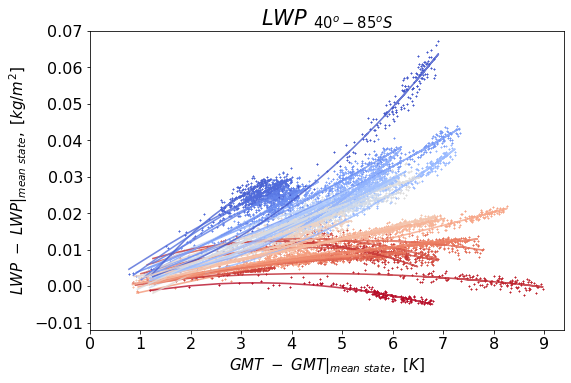

In [98]:
# Plotting: 
# print(an_delta_GMT)
# print(an_delta_LWP_raw)

import matplotlib
parameters = {'axes.labelsize': 15, 'legend.fontsize': 14,
         'axes.titlesize': 21,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)

fig, ax = plt.subplots(1, 1, figsize=(8.5, 5.5))

# print(s_range[1:10])
DLWP_Dgmt = area_mean(delta_LWP_dTg_ALL_5X5[:, 1:10, :], s_range[1:10], x_range)
# print(DLWP_Dgmt)
DLWP_Dgmt = np.asarray(DLWP_Dgmt)

sorted_DLWP_Dgmt_index = sorted(range(50), key = lambda index:DLWP_Dgmt[index])
ordinal_DLWP_Dgmt_index = [sorted_DLWP_Dgmt_index.index(i) for i in range(50)]
# print(sorted_DLWP_Dgmt_index)
# print(ordinal_DLWP_Dgmt_index)

# Colors:
inferno_colormap = matplotlib.cm.get_cmap("coolwarm_r")
COLORS = [inferno_colormap(x) for x in np.linspace(0.01, 0.97, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
# print(COLORS)

for i in range(len(deck2)):
    x = an_delta_GMT[i]
    ax.scatter(x, an_delta_LWP_raw[i], c = COLORS[ordinal_DLWP_Dgmt_index[i]], marker = 'x', s= 1)
    POPT_gmtLWP, POCV_gmtLWP = curve_fit(target_func_poly2, an_delta_GMT[i], an_delta_LWP_raw[i])
    # print(POPT_gmtLWP)
    ax.plot(x, POPT_gmtLWP[0] * x**2 + POPT_gmtLWP[1] * x**1 + POPT_gmtLWP[2], color = COLORS[ordinal_DLWP_Dgmt_index[i]], linewidth = 1.6, linestyle = '-', alpha = 0.8, zorder = 99)
    
# Plot setting:

ax.set_xlim(0., 9.4)
ax.set_xticks(arange(0, 10, 1))
ax.set_ylim(-0.012, 0.07)
ax.set_yticks(arange(-0.01, 0.08, 0.01))
ax.set_xlabel(r"$GMT\ -\ GMT|_{mean\ state},\ [K]$")
ax.set_ylabel(r"$LWP\ -\ LWP|_{mean\ state},\ [kg/m^{2}]$")

ax.set_title(r"$LWP\ _{40^{o} -85^{o} S}$", )

# plt.savefig(path6 +"Figs1:annuallytimeseries_DLWP(SO)_Dgmt(globally).jpg", bbox_inches = 'tight', dpi = 425)

In [35]:
# calc the mean state LWP and delta LWP and delta P-E in global 5 x 5 bin resolutions;

delta_LWP_dTg_ALL_5X5 = full((len(deck2), SWCLD_5.shape[1], SWCLD_5.shape[2]), 0.0)  # GLOBAL lwp changes
mean_LWP_ALL_5X5 = full((len(deck2), SWCLD_5.shape[1], SWCLD_5.shape[2]), 0.0)  # GLOBAL Mean State lwp

delta_P_E_dTg_ALL_5X5 = full((len(deck2), SWCLD_5.shape[1], SWCLD_5.shape[2]), 0.0)  # Global moisture convergence changes

f20yr_index = 121*12
l20yr_index = 141*12

# print(output_abr_bin_var[deck_nas2[0]][()]['LWP_mon_bin'])
for i in range(len(deck_nas2)):
    delta_LWP_dTg_ALL_5X5[i] = (np.nanmean(output_abr_bin_var[deck_nas2[i]][()]['LWP_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) - np.nanmean(output_PI_bin_var[deck_nas2[i]][()]['LWP_mon_bin'], axis = 0)) / delta_gmt[i]
    mean_LWP_ALL_5X5[i] = deepcopy(np.nanmean(output_PI_bin_var[deck_nas2[i]][()]['LWP_mon_bin'], axis = 0))
    delta_P_E_dTg_ALL_5X5[i] = (np.nanmean(output_abr_bin_var[deck_nas2[i]][()]['p_e_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) - np.nanmean(output_PI_bin_var[deck_nas2[i]][()]['p_e_mon_bin'], axis = 0)) / delta_gmt[i]

# print(output_abr_bin_var[deck_nas2[0]][()]['p_e_mon_bin'])


# Calculate the MULTI-Model Mean SWCLD:

MM_SWCLD_raw = full((SWCLD_withoutNaN.shape[1], SWCLD_withoutNaN.shape[2]), 0.0)
MM_SWCLD_5 = full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 0.0)

MM_SWCLD_raw = np.nanmean(SWCLD_withoutNaN, axis = 0)
MM_SWCLD_5 = np.nanmean(SWCLD_5, axis = 0)
print(s_range, x_range)


# Calculate the std deviation of (P - E)

sigmaXi_global = full((len(deck2), 4), 0.0)  # Global standard deviation of Cloud-controlling Factors
for i in range(len(deck_nas2)):
    

    sigmaXi_global[i, :] = np.asarray([np.nanstd(output_PI_bin_var[deck_nas2[i]][()]['SST_mon_bin']), np.nanstd(output_PI_bin_var[deck_nas2[i]][()]['p_e_mon_bin']), 
                          np.nanstd(output_PI_bin_var[deck_nas2[i]][()]['LTS_mon_bin']), np.nanstd(output_PI_bin_var[deck_nas2[i]][()]['SUB_mon_bin'])])

# print(sigmaXi_global)

[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5  87.5] [-180. -175. -170. -165. -160. -155. -150. -145. -140. -135. -130. -125.
 -120. -115. -110. -105. -100.  -95.  -90.  -85.  -80.  -75.  -70.  -65.
  -60.  -55.  -50.  -45.  -40.  -35.  -30.  -25.  -20.  -15.  -10.   -5.
    0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.  125.  130.  135.  140.  145.  150.  155.  160.  165.  170.  175.]


[False  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False] [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True False]
['#4961d2', '#4f69d9', '#5572df', '#5a78e4', '#6180e9', '#6788ee', '#6e90f2', '#7396f5', '#7a9df8', '#81a4fb', '#86a9fc', '#8db0fe', '#94b6ff', '#9abbff', '#a1c0ff', '#a7c5fe', '#aec9fc', '#b3cdfb', '#bad0f8', '#c0d4f5', '#c5d6f2', '#cbd8ee', '#d1dae9', '#d5dbe5', '#dadce0', '#dfdbd9', '#e4d9d2', '#e8d6cc', '#ecd3c5', '#efcebd', '#f2cbb7', '#f4c6af', '#f5c0a7', '#f7bca1', '#f7b599', '#f7af91', '#f7a889', '#f6a283', '#f49a7b', '#f29274', '#f08b6e', '#ed8366', '#e97a5f', '#e67259', '#e26952', '#dd5f4b', '#d75445', '#d24b40', '#cc403a', '#c53334']


Text(0.5, 0, '$lat$')

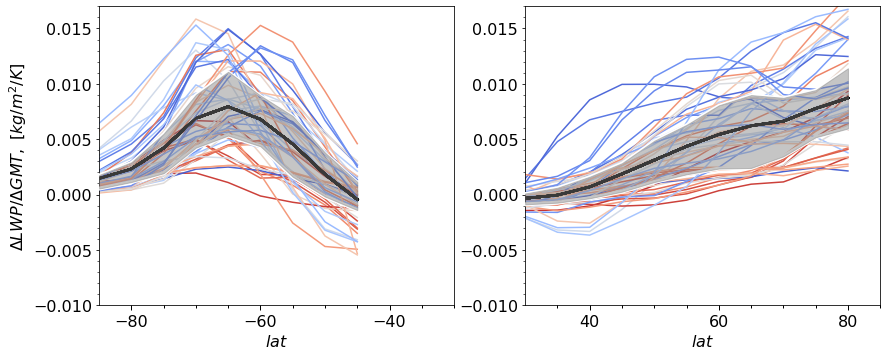

In [68]:
# Re-plot Fig 1: \Delta LWP/ \Delta GMT in 5X5 vs. Extratropical Lat:

import matplotlib
parameters = {'axes.labelsize': 16, 'legend.fontsize': 14,
         'axes.titlesize': 22,  'xtick.labelsize': 16,  'ytick.labelsize': 16}
plt.rcParams.update(parameters)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5.5))

ax1.minorticks_on()
ax1.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
ax1.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

ax2.minorticks_on()
ax2.tick_params(axis='x', which='major', direction='out', top=False, length= 5., width = 1., reset = True)
ax2.tick_params(axis='x', which='minor', direction='out', top=False, length= 3., width = 1., reset = True)

p50_MM = np.full((len(s_range), 2), 0.00)
p95_MM = np.full((len(s_range), 2), 0.00)

# print(lat_mz)
lat_range1 = [-85., -40.] 
lat_range2 = [ 30.,  85.]
ind1 = (s_range <=max(lat_range1)) & (s_range >= min(lat_range1))
ind2 = (s_range <=max(lat_range2)) & (s_range >= min(lat_range2))
print(ind1, ind2)

lonmean_MLAT_DlwpDgmt = np.nanmean(delta_LWP_dTg_ALL_5X5, axis = (2))

for i in range(len(s_range)):
    
    p50_MM[i, 0] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 25.)
    p95_MM[i, 0] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 2.5)
    p50_MM[i, 1] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 75.)
    p95_MM[i, 1] = np.nanpercentile(lonmean_MLAT_DlwpDgmt[:, i], 97.5)
mean_LAT_DlwpDgmt = np.nanmean(delta_LWP_dTg_ALL_5X5, axis = (0, 2))

ECS = []
for i in range(len(deck_nas2)):
    ECS.append(EffCS[deck_nas2[i]])
ECS = np.asarray(ECS)
sorted_EffCS_index = sorted(range(50), key = lambda index:ECS[index])
ordinal_EffCS_index = [sorted_EffCS_index.index(i) for i in range(50)]
# print(sorted_EffCS_index)
# print(ordinal_EffCS_index)

# Colors:
coolwarm_colormap = matplotlib.cm.get_cmap("coolwarm")
COLORS = [coolwarm_colormap(x) for x in np.linspace(0.05, 0.95, num=50)]
COLORS = [matplotlib.colors.to_hex(color) for color in COLORS]
print(COLORS)

for i in range(len(deck_nas2)):
    
    ss = delta_LWP_dTg_ALL_5X5[i, :,:]
    xx = nanmean(ss, axis = 1)
    # Remove the NaN value in 1-D vector:
    ind_truevector = isnan(xx)==False
    
    ind1_true = np.logical_and(ind1, ind_truevector)
    ind2_true = np.logical_and(ind2, ind_truevector)
    # print(arange(min(lat_range1), max(lat_range1), 2.))
    ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), xx[ind1_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), mean_LAT_DlwpDgmt[ind1_true], linewidth = 2.5, c = 'k', linestyle = '-')
    
    ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), xx[ind2_true], color = COLORS[ordinal_EffCS_index[i]], linestyle = '-')
    ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), mean_LAT_DlwpDgmt[ind2_true], linewidth = 2.5, c = 'k', linestyle = '-')
    
# Shading: 

ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
# ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM[:, 0][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
# ax1.plot(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM[:, 1][ind1_true], linestyle = '-', c= 'white', linewidth = 1.4, zorder = 97)
ax1.fill_between(np.arange(min(lat_range1), max(lat_range1), 5.), p50_MM[:, 0][ind1_true], p50_MM[:, 1][ind1_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax1.fill_between(np.arange(min(lat_range1), max(lat_range1), 5.), p95_MM[:, 0][ind1_true], p95_MM[:, 1][ind1_true], color = 'gray', alpha = 0.35, zorder = 99)

ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM[:, 0][ind2_true], linestyle = '-', c= 'white', linewidth = 4.0, zorder = 97)
ax2.plot(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM[:, 1][ind2_true], linestyle = '-', c= 'white', linewidth = 2.8, zorder = 97)
ax2.fill_between(np.arange(min(lat_range2), max(lat_range2), 5.), p50_MM[:, 0][ind2_true], p50_MM[:, 1][ind2_true], color = 'gray', alpha = 0.45, zorder = 98)
# ax2.fill_between(np.arange(min(lat_range2), max(lat_range2), 5.), p95_MM[:, 0][ind2_true], p95_MM[:, 1][ind2_true], color = 'gray', alpha = 0.35, zorder = 99)

# Plot setting:
ax1.set_xlim(-85., -30.)
ax1.set_xticks(arange(-80., -30., 20.))
ax1.set_ylim(-0.010, 0.017)

ax2.set_xlim(30., 85.)
ax2.set_xticks(arange(40., 85., 20.))
ax2.set_ylim(-0.010, 0.017)

ax1.set_xlabel(r"$lat$")
ax1.set_ylabel(r"$\Delta LWP / \Delta GMT,\ [kg/m^{2}/K] $")

ax2.set_xlabel(r"$lat$")
# ax2.set_ylabel(r"$\Delta LWP / \Delta GMT,\ [kg/m^{2}/K] $")


# plt.savefig(path6 +"Fig1:(b)_5X5.jpg", bbox_inches = 'tight', dpi = 425)

In [52]:
print(np.nanmean(output_PI_bin_var[deck_nas2[0]][()]['LWP_mon_bin'], axis = 0))

print(np.nanmean(output_abr_bin_var[deck_nas2[0]][()]['LWP_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0))

print(np.nanmean(output_abr_bin_var[deck_nas2[0]][()]['LWP_mon_bin'][f20yr_index:l20yr_index,:,:], axis = 0) / delta_gmt[i])

[[0.03387298 0.03657373 0.03900813 ... 0.02528357 0.02806758 0.03097965]
 [0.06766189 0.06606658 0.06447143 ... 0.04791943 0.05874008 0.06576702]
 [0.09986777 0.09200121 0.09113856 ... 0.07353392 0.09619654 0.10596366]
 ...
 [0.10380455 0.10578344 0.10657477 ... 0.09869234 0.09978596 0.10147558]
 [0.09806605 0.09833155 0.09878223 ... 0.09871965 0.09833456 0.09813696]
 [0.10127711 0.10197914 0.1025167  ... 0.09862029 0.09960381 0.10048862]]
[[0.05999717 0.06343109 0.06634244 ... 0.04759254 0.05191535 0.05614026]
 [0.09349764 0.09127953 0.08914156 ... 0.07264288 0.08519219 0.09229837]
 [0.13656187 0.13255016 0.13475086 ... 0.10511162 0.12752838 0.13744972]
 ...
 [0.17783722 0.17954644 0.17804398 ... 0.1695164  0.17298555 0.17482825]
 [0.1756124  0.17535601 0.17605178 ... 0.1764193  0.17704908 0.17629805]
 [0.18065562 0.18156698 0.18244215 ... 0.17733519 0.17853417 0.17954318]]
[[0.015725   0.01662502 0.01738807 ... 0.0124738  0.0136068  0.01471413]
 [0.02450534 0.02392398 0.02336363 ... 

(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


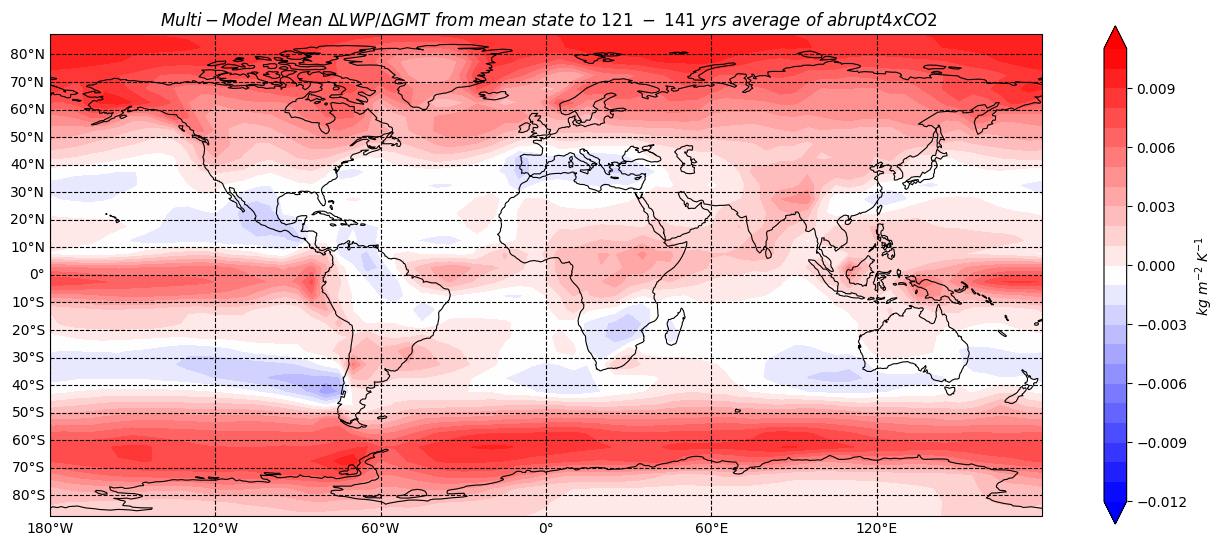

In [53]:
# Plotting to see the models' mean of \Delta LWP:

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_MM_dLWP, cycle_lon = add_cyclic_point(np.nanmean(delta_LWP_dTg_ALL_5X5, axis = 0), coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)


# begin plotting:

proj = ccrs.PlateCarree()
fig9 = plt.figure(figsize=(16, 15), dpi = 100)
ax9 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax9.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-12.0, 12.0, 1) *0.001

contourf1 = ax9.contourf(X, Y, cycle_MM_dLWP, levels= clevel, cmap= 'bwr', extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

cb2 = fig9.colorbar(contourf1, ax = ax9, orientation='vertical', label = r"$kg\ m^{-2}\ K^{-1}$", extend ='both', shrink = 0.44, pad = 0.05)

ax9.set_title(r'$\ Multi-Model\ Mean\ \Delta LWP/ \Delta GMT\ from\ mean\ state\ to\ 121\ -\ 141\ yrs\ average\ of\ abrupt4xCO2$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax9.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Multi-modelMean_DeltaLWPscaledbygmt.png', bbox_inches ='tight', dpi = 125)

# Multi-model Mean global averaged \Delta LWP: 
# print("Model-mean globally averaged Change in LWP: ", np.nanmean(area_mean(delta_LWP_ALL_5X5, s_range,x_range), axis = 0), r"$kg m^{-2}$")

(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


Model-mean globally averaged Change in moisture Convergence:  -0.0034070051730394307 $mm\ day^{-1}$


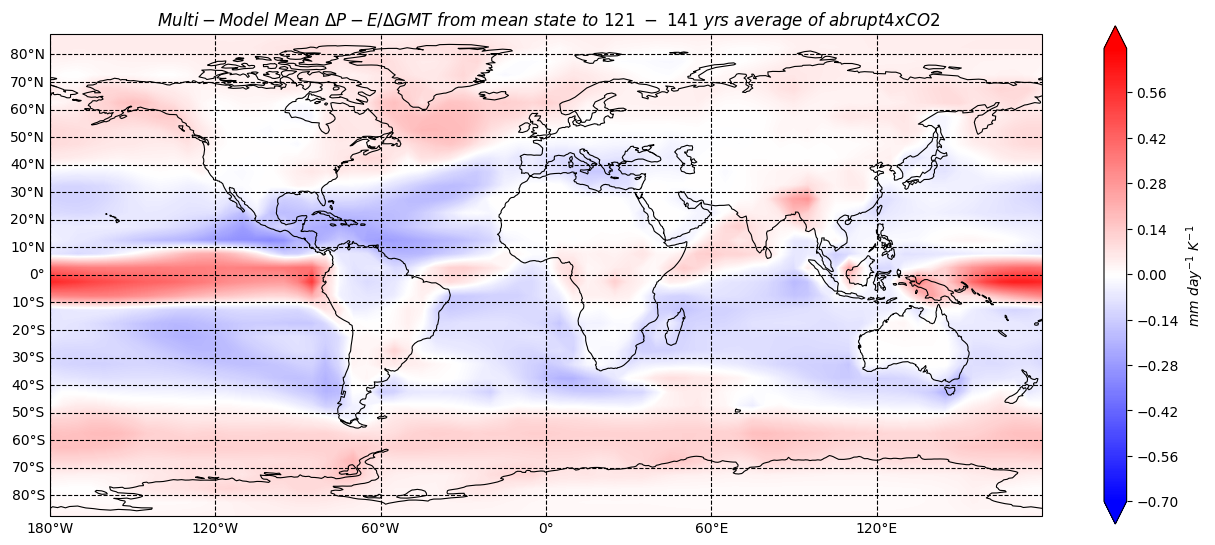

In [54]:
# Plotting to see the models' mean of \Delta_P - E / \Delta GMT:

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_MMdP_E, cycle_lon = add_cyclic_point(np.nanmean(delta_P_E_dTg_ALL_5X5, axis = 0), coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# begin plotting:

proj = ccrs.PlateCarree()
fig10 = plt.figure(figsize=(16, 15), dpi = 100)
ax10 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax10.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-0.7, 0.7, 0.005)

contourf1 = ax10.contourf(X, Y, cycle_MMdP_E, levels= clevel, cmap= 'bwr', extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

cb2 = fig10.colorbar(contourf1, ax = ax10, orientation='vertical', label = r"$mm\ day^{-1}\ K^{-1}$", extend ='both', shrink = 0.44, pad = 0.05)

ax10.set_title(r'$\ Multi-Model\ Mean\ \Delta {P - E} / \Delta GMT\ from\ mean\ state\ to\ 121\ -\ 141\ yrs\ average\ of\ abrupt4xCO2$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax10.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Multi-modelMean_DeltaP_E_scaledbygmt.png', bbox_inches ='tight', dpi = 125)

# Multi-model Mean global averaged \Delta LWP: 
print("Model-mean globally averaged Change in moisture Convergence: ", np.nanmean(area_mean(delta_P_E_dTg_ALL_5X5, s_range,x_range), axis = 0), r"$mm\ day^{-1}$")

(90,) (144,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


Model-mean globally averaged SW cloud feedback:  -0.022809512530180518 $W\ m^{-2}$


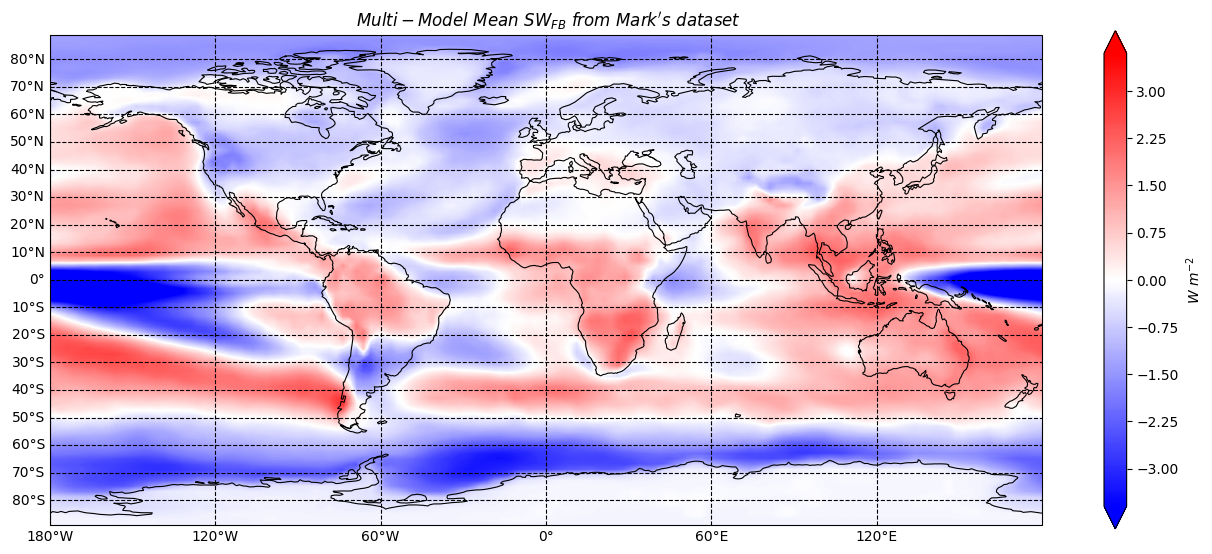

In [35]:
# Plotting to see the models' mean SW cloud feedback:

# Latitude and Longitude array:
LAT = lat_mz
LON = lon_mz2
cycle_MMSWfb, cycle_lon = add_cyclic_point(MM_SWCLD_raw, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# begin plotting:

proj = ccrs.PlateCarree()
fig11 = plt.figure(figsize=(16, 15), dpi = 100)
ax11 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax11.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-3.6, 3.6, 0.03)

contourf1 = ax11.contourf(X, Y, cycle_MMSWfb, levels= clevel, cmap= 'bwr', extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

cb2 = fig11.colorbar(contourf1, ax = ax11, orientation='vertical', label = r"$W\ m^{-2}$", extend ='both', shrink = 0.44, pad = 0.05)

ax11.set_title(r"$\ Multi-Model\ Mean\ SW_{FB}\ from\ Mark's\ dataset$", fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax11.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Multi-modelMean_SWFB.png', bbox_inches ='tight', dpi = 125)

# Multi-model Mean global averaged \Delta LWP: 
print("Model-mean globally averaged SW cloud feedback: ", np.nanmean(area_mean(SWCLD_5, s_range, x_range), axis = 0), r"$W\ m^{-2}$")

In [36]:
pearsonr_map_LWP0_dLWPdP_E = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)
pvalue_map_LWP0_dLWPdP_E = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)

# Calc the correlation coefficients map between moisture convergence sensitivity and mean-state LWP:

for k in range(SWCLD_5.shape[1]):    
    for t in range(SWCLD_5.shape[2]):
        
        a2, b2 = pearsonr(stcoef_r2[:, 1], mean_LWP_ALL_5X5[:,k,t])
        pearsonr_map_LWP0_dLWPdP_E[k, t] = a2
        pvalue_map_LWP0_dLWPdP_E[k, t] = b2
    
print(pearsonr(stcoef_r2[:, 1], delta_LWP_dTg_ALL_5X5[:,1, 1]))


# Calc the correlation coefficients map between moisture convergence sensitivity and \Delta LWP:

pearsonr_map_dLWP_dLWPdP_E = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)
pvalue_map_dLWP_dLWPdP_E = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)

for kt in range(SWCLD_5.shape[1]):    
    for tt in range(SWCLD_5.shape[2]):
        
        a3, b3 = pearsonr(stcoef_r2[:, 1], (delta_LWP_dTg_ALL_5X5[:,kt,tt] * delta_gmt[:]) )
        pearsonr_map_dLWP_dLWPdP_E[kt, tt] = a3
        pvalue_map_dLWP_dLWPdP_E[kt, tt] = b3
    
print(pearsonr(stcoef_r2[:, 1], mean_LWP_ALL_5X5[:,1, 1]))

# Calc the correlation coefficient between spatially distributed SWfb and mean-state LWP:

pearsonr_map_SWfb_LWP0 = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)
pvalue_map_SWfb_LWP0 = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)


for kr in range(SWCLD_5.shape[1]): 
    for tr in range(SWCLD_5.shape[2]):
        
        a4, b4 = pearsonr(mean_LWP_ALL_5X5[:,kr,tr], SWCLD_5[:,kr,tr])
        pearsonr_map_SWfb_LWP0[kr, tr] = a4
        pvalue_map_SWfb_LWP0[kr, tr] = b4
    
print(pearsonr(mean_LWP_ALL_5X5[:,1, 1], SWCLD_5[:,1, 1]))
# print(pearsonr_map_SWfb_LWP0.shape)

# Calc the correlation coefficients map between (moisture convergence sensitivity * \Delta(P - E)/ \Delta gmt) and \Delta LWP/ \Delta gmt:

pearsonr_map_DeltaLWP_DeltaP_EtdLWPdP_E = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)
pvalue_map_DeltaLWP_DeltaP_EtdLWPdP_E = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)

for kj in range(SWCLD_5.shape[1]):    
    for tj in range(SWCLD_5.shape[2]):
        
        a5, b5 = pearsonr( (stcoef_r2[:, 1] * delta_P_E_dTg_ALL_5X5[:,kj, tj] / sigmaXi_global[:, 1]), delta_LWP_dTg_ALL_5X5[:,kj,tj])
        pearsonr_map_DeltaLWP_DeltaP_EtdLWPdP_E[kj, tj] = a5
        pvalue_map_DeltaLWP_DeltaP_EtdLWPdP_E[kj, tj] = b5
    
print(pearsonr((stcoef_r2[:, 1] * delta_P_E_dTg_ALL_5X5[:, 1, 1]), mean_LWP_ALL_5X5[:,1, 1]))


# Calc the correlation coefficient between spatially distributed SWfb and \Delta LWP/ \Delta gmt : 

pearsonr_map_SWfb_DeltaLWP = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)
pvalue_map_SWfb_DeltaLWP = np.full((SWCLD_5.shape[1], SWCLD_5.shape[2]), 999.9)

for ki in range(SWCLD_5.shape[1]):    
    for ti in range(SWCLD_5.shape[2]):
        
        a6, b6 = pearsonr(delta_LWP_dTg_ALL_5X5[:,ki, ti], SWCLD_5[:,ki,ti])
        pearsonr_map_SWfb_DeltaLWP[ki, ti] = a6
        pvalue_map_SWfb_DeltaLWP[ki, ti] = b6
    
print(pearsonr(delta_LWP_dTg_ALL_5X5[:,1, 1], SWCLD_5[:,1, 1]))


(0.4632433517056349, 0.000704655335350423)
(0.6415332588845106, 5.163433049520035e-07)
(0.23754271424280937, 0.09669998739480193)
(0.14349169718480753, 0.32015810893414987)
(-0.010761278176357893, 0.9408741644511545)


In [37]:
print(pearsonr_map_LWP0_dLWPdP_E.shape)

for i in range(SWCLD_5.shape[1]):
    
    for j in range(SWCLD_5.shape[2]):
        
        if pearsonr_map_LWP0_dLWPdP_E[i, j] < 1e-5:
            print("i0!")
            print(i, j, pearsonr_map_LWP0_dLWPdP_E[i, j])
    


(36, 72)
i0!
13 20 -0.0015046070021071112


(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


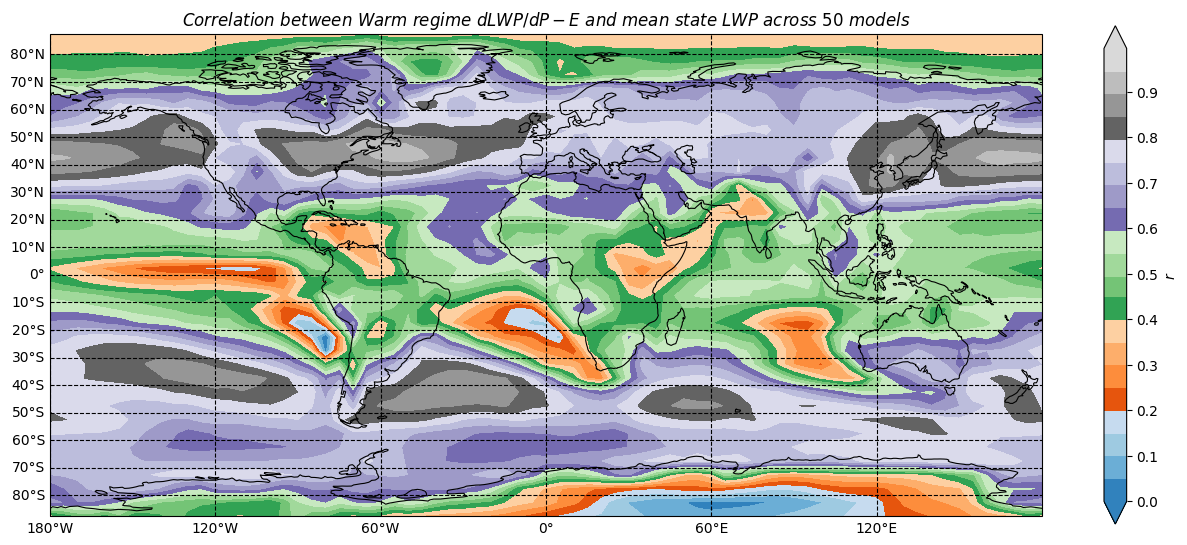

In [38]:
# Plotting Mean State LWP against Moisture Convergence sensitivity correlations map:

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs   #..projection method
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from copy import deepcopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_LWP0_dLWPdP_E, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_LWP0_dLWPdP_E, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig6 = plt.figure(figsize=(16, 15), dpi = 100)
ax6 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax6.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(0.00, 1.0, 0.005)
clevel_P_E = np.arange(-0.56, 0.56, 0.085)
# contour1 = ax6.contour(X, Y, cycle_MMdP_E, levels= clevel_P_E, colors = 'red', linewidth = 0.6, alpha = 0.5, extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

contourf1 = ax6.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap= 'tab20c', extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

cb2 = fig6.colorbar(contourf1, ax = ax6, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
# c1b = ax6.contourf(X, Y, cycle_pvalue, levels= [0., 0.01, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax6.set_title(r'$Correlation\ between\ Warm\ regime\ dLWP/d{P - E}\ and\ mean\ state\ LWP\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax6.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_WarmdLWP_dP_E_LWP0_withDeltaP_E.png', bbox_inches ='tight', dpi = 100)


(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


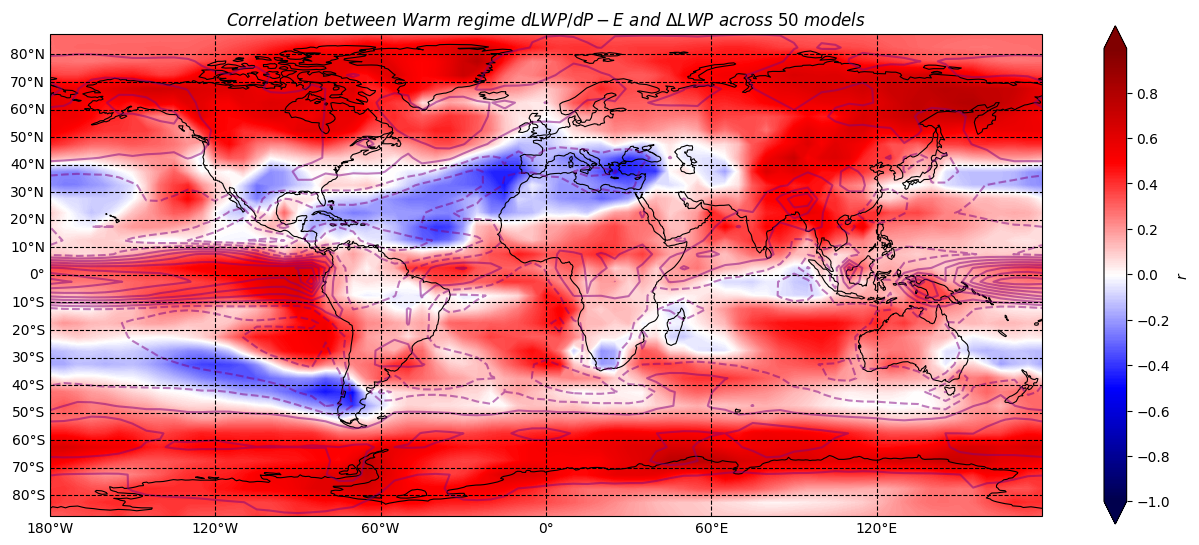

In [39]:
# Plotting \Delta LWP|(abrupt4xco2 - piControl) againsit Moisture Convergence sensitivity correlations map: 

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_dLWP_dLWPdP_E, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_dLWP_dLWPdP_E, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig7 = plt.figure(figsize=(16, 15), dpi = 100)
ax7 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax7.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-1.0, 1.0, 0.005)
clevel_P_E = np.arange(-0.56, 0.56, 0.085)

contour1 = ax7.contour(X, Y, cycle_MMdP_E, levels= clevel_P_E, colors = 'purple', linewidth = 0.6, alpha = 0.5, extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

contourf1 = ax7.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap='seismic', extend='both')  # predict_label_LWP_PI[t_PI,:,:]

cb2 = fig7.colorbar(contourf1, ax = ax7, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
# c1b = ax7.contourf(X, Y, cycle_pvalue, levels= [0., 0.01, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax7.set_title(r'$Correlation\ between\ Warm\ regime\ dLWP/d{P - E}\ and\ \Delta LWP\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax7.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_WarmdLWP_dP_E_DeltaLWP_withDeltaP_E.png', bbox_inches ='tight', dpi = 100)


(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


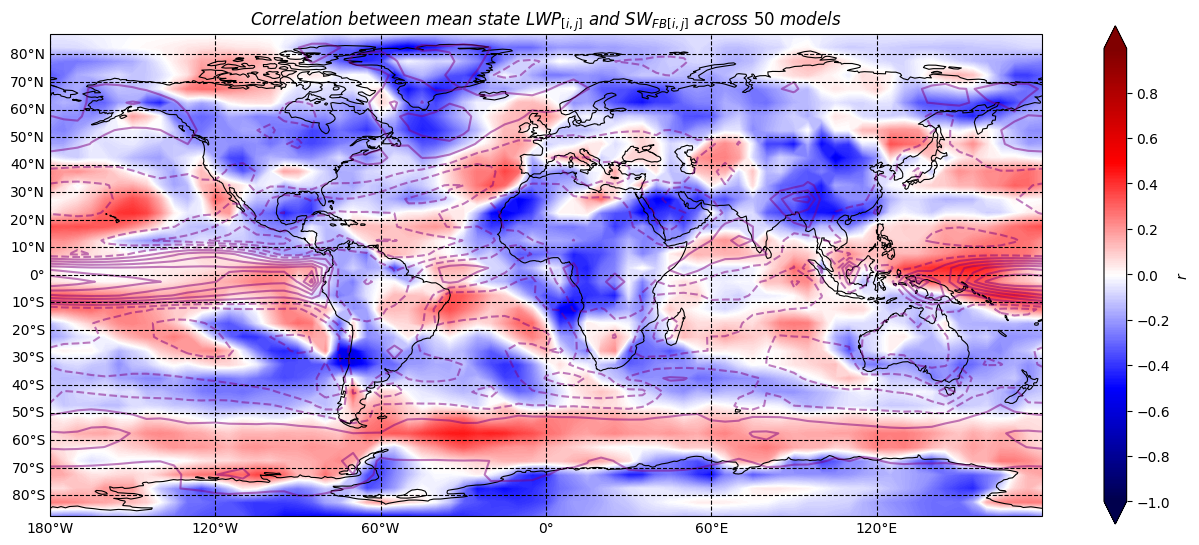

In [41]:
# Plotting spatial correlation coefficients map of r(SWfb[i, j], Mean State LWP[i, j]):

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_SWfb_LWP0, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_SWfb_LWP0, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig8 = plt.figure(figsize=(16, 15), dpi = 100)
ax8 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax8.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-1.0, 1.0, 0.005)
clevel_P_E = np.arange(-0.52, 0.52, 0.085)

contour1 = ax8.contour(X, Y, cycle_MMdP_E, levels= clevel_P_E, colors = 'purple', linewidth = 0.6, alpha = 0.5, extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

contourf1 = ax8.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap='seismic', extend='both')  # predict_label_LWP_PI[t_PI,:,:]

cb2 = fig8.colorbar(contourf1, ax = ax8, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
# c1b = ax8.contourf(X, Y, cycle_pvalue, levels= [0., 0.01, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax8.set_title(r'$Correlation\ between\ mean\ state\ LWP_{[i, j]}\ and\ SW_{FB[i, j]}\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax8.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_MeanstateLWP_SWfb_withDeltaP_E.png', bbox_inches ='tight', dpi = 100)


(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


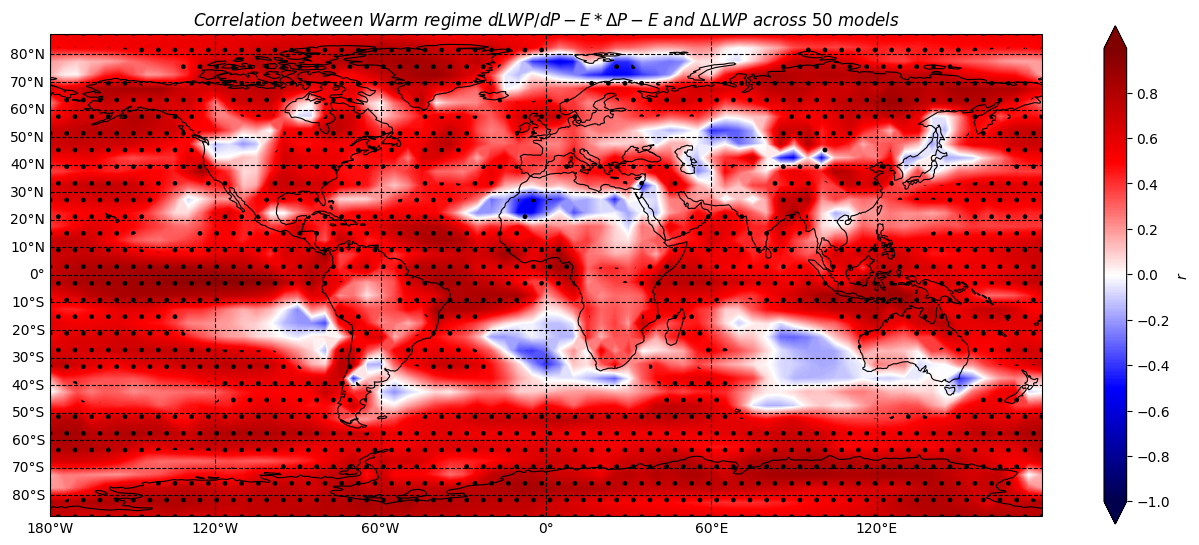

In [42]:
# Plotting \Delta LWP|(abrupt4xco2 - piControl) againsit (Moisture Convergence sensitivity * \Delta (P - E)) correlations map: 

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_DeltaLWP_DeltaP_EtdLWPdP_E, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_DeltaLWP_DeltaP_EtdLWPdP_E, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig12 = plt.figure(figsize=(16, 15), dpi = 100)
ax12 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax12.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-1.0, 1.0, 0.005)
clevel_P_E = np.arange(-0.56, 0.56, 0.085)

# contour1 = ax12.contour(X, Y, cycle_MMdP_E, levels= clevel_P_E, colors = 'purple', linewidth = 0.6, alpha = 0.5, extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

contourf1 = ax12.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap='seismic', extend='both')  # predict_label_LWP_PI[t_PI,:,:]

cb2 = fig12.colorbar(contourf1, ax = ax12, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
c1b = ax12.contourf(X, Y, cycle_pvalue, levels= [0., 0.01, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax12.set_title(r'$Correlation\ between\ Warm\ regime\ dLWP/d{P - E} * \Delta {P - E}\ and\ \Delta LWP\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax12.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_Warm(dLWP_dP_EtDeltaP_E)_DeltaLWP_withDeltaP_E.png', bbox_inches ='tight', dpi = 100)


In [43]:
print(delta_LWP_dTg_ALL_5X5[:, 11, 36])

print(stcoef_r2[:, 1] * delta_P_E_dTg_ALL_5X5[:, 11, 36])

print(s_range[11], ": Lat", x_range[36], ": Lon")

# print(pearsonr(delta_LWP_dTg_ALL_5X5[:, 11, 36], delta_P_E_dTg_ALL_5X5[:, 11, 36]))

[-7.60815831e-04 -1.06306162e-03 -2.42032608e-03 -2.18025698e-03
 -2.93671398e-03 -2.51483760e-04  2.12002633e-03  7.41907613e-04
 -2.26175419e-03 -5.35985979e-04  1.88170661e-03 -5.78435448e-04
 -7.40022421e-04 -8.34614525e-04 -8.52592283e-04 -1.95990828e-03
 -1.63230523e-03 -1.42282180e-03 -1.35933016e-03 -2.04959895e-03
 -2.13564553e-03 -4.55167627e-06 -2.56119052e-04  5.73276338e-05
  3.03928995e-05  6.39167144e-05  7.36884255e-04 -1.56494539e-03
 -3.36607350e-03 -1.65282306e-03 -4.96424397e-04 -1.02656771e-03
 -7.20826247e-04 -3.22884764e-03 -2.49886656e-03 -1.88825636e-03
 -2.54073668e-03 -1.33352546e-03  1.62325498e-04  2.04123367e-03
 -3.56754632e-03  5.66025856e-04 -1.97563965e-03 -3.29512847e-03
 -3.10222390e-03 -1.31203888e-03 -7.59305840e-04 -1.46602391e-03
 -1.64632926e-04 -1.34011738e-03]
[ -5.70004858  -1.79823048  -0.18492139  -0.16728944  -0.18702606
  -2.19597956  -8.79169731  -4.85126273  -4.48059386  -4.58655931
 -13.52915993  -0.35524934  -1.11047096  -2.14601466  

Text(0, 0.5, '$\\Delta {LWP}/ \\Delta GMT$')

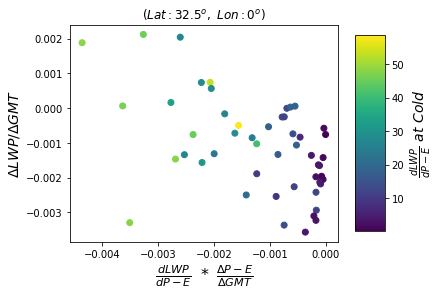

In [44]:
plt.figure()

denp_p_e = plt.scatter((stcoef_r1[:, 1] / 1000.) * delta_P_E_dTg_ALL_5X5[:, 11, 36] / sigmaXi_global[:, 1], delta_LWP_dTg_ALL_5X5[:, 11, 36], c = stcoef_r1[:, 1], marker = 'o')
cb_p_e = plt.colorbar(denp_p_e, shrink = 0.9, aspect = 6.5)
cb_p_e.set_label(r"$\frac{dLWP}{dP-E}\ at\ Cold$", fontsize = 14)

plt.title(r"$(Lat:32.5^{o},\ Lon:0^{o})$")
plt.xlabel(r"$\frac{dLWP}{dP-E}\ *\ \frac{\Delta {P - E}} {\Delta GMT}$", fontsize = 16)
plt.ylabel(r"$\Delta {LWP}/ \Delta GMT$", fontsize = 14)

# plt.savefig(path6 + 'exploring_negative_relationship_ColddLWPdP_E_SWfb.jpg', bbox_inches = 'tight', dpi = 100)

(36,) (72,)


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


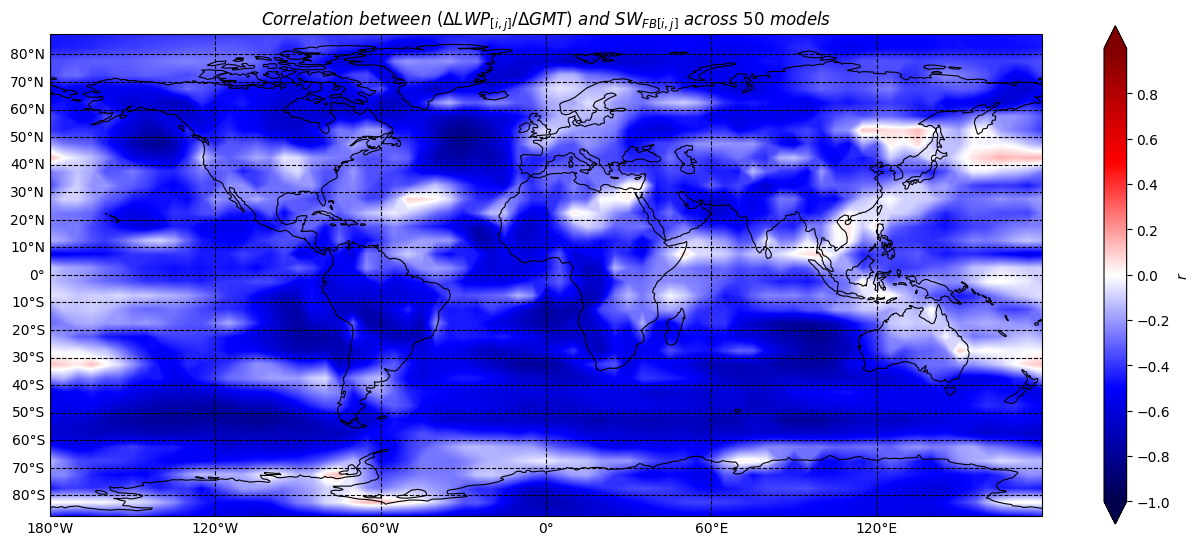

In [50]:
# Plotting spatial correlation coefficients map of r(SWfb[i, j], Change of LWP[i, j] scaled by \Delta gmt[i, j]):

# Latitude and Longitude array:
LAT = s_range
LON = x_range
cycle_pearsonr, cycle_lon = add_cyclic_point(pearsonr_map_SWfb_DeltaLWP, coord = LON)
cycle_pvalue, cycle_lon = add_cyclic_point(pvalue_map_SWfb_DeltaLWP, coord = LON)
X, Y = np.meshgrid(cycle_lon, LAT)
print(LAT.shape, LON.shape)

# Propagate the 'nan' in CERES and MAC-LWP:

# Processing 'nan' in aggregated data:
# Z_training_gcm = (rsdt_GCM * ck_a_GCM * x_GCM * y2_GCM * y1_GCM) * 1.
# ind_false_gcm = np.isnan(Z_training_gcm)
# ind_true_gcm = np.logical_not(ind_false_gcm)

# ck_a_GCM[ind_false_gcm] = np.nan
# print(ck_a_GCM.shape)

# begin plotting:
proj = ccrs.PlateCarree()
fig13 = plt.figure(figsize=(16, 15), dpi = 100)
ax13 = plt.subplot(111, projection = proj)

#..map attributes country border, coastline, Rivers, Lakes..
ax13.add_feature(cfeat.COASTLINE.with_scale('110m'), zorder=1, linewidth=0.8)
clevel = np.arange(-1.0, 1.0, 0.001)
clevel_P_E = np.arange(-0.52, 0.52, 0.085)

# contour1 = ax13.contour(X, Y, cycle_MMdP_E, levels= clevel_P_E, colors = 'purple', linewidth = 0.6, alpha = 0.5, extend='both')  # predict_label_LWP_PI[t_PI,:,:]  

contourf1 = ax13.contourf(X, Y, cycle_pearsonr, levels= clevel, cmap='seismic', extend='both')  # predict_label_LWP_PI[t_PI,:,:]

cb2 = fig13.colorbar(contourf1, ax = ax13, orientation='vertical', label = r"$ r $", extend ='both', shrink = 0.44, pad = 0.05)
# c1b = ax13.contourf(X, Y, cycle_pvalue, levels= [0., 0.01, 1], zorder = 1, hatches=['.', None], alpha = 0)

ax13.set_title(r'$Correlation\ between\ (\Delta LWP_{[i, j]}/ \Delta GMT)\ and\ SW_{FB[i, j]}\ across\ 50\ models$', fontsize = 12)

extent = [-180, 180, -90, 90]
gl = ax13.gridlines(crs = proj, draw_labels=True, linewidth = 0.8, color = 'k', alpha = 1.0, linestyle = '--', zorder = 99)

gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(extent[0], extent[1], 60.))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2], extent[3], 10.))

# plt.show()
# plt.savefig(path6+'Correlation_DeltaLWPscaledbygmt_LWP_SWfb.png', bbox_inches ='tight', dpi = 100)


In [51]:
print(pearsonr_map_SWfb_DeltaLWP.shape)
a = 0
for i in range(SWCLD_5.shape[1]):
    
    for j in range(SWCLD_5.shape[2]):
        
        if pearsonr_map_SWfb_DeltaLWP[i, j] > 1e-5:
            # print("i0!")
            # print(i, j, pearsonr_map_SWfb_DeltaLWP[i, j])
            a = a + 1
print(a)

(36, 72)
55
